# ML Project 1 (Car CO2 Emission)

## About Dataset

**EN:** This dataset captures the details of how CO2 emissions by a vehicle can vary with the different features. The dataset has been taken from Canada Government official open data website. This is a compiled version. This contains data over a period of 7 years (2014-2020). There are total 7385 rows and 12 columns. There are few abbreviations that has been used to describe the features.  

**1. Make:** Company of the vehicle (Arac markasi)

**2. Model:** Car model

   **4WD/4X4:** Four-wheel drive (4 Ceker)

   **AWD:** All-wheel drive 

   **FFV:** Flexible-fuel vehicle

   **SWB:** Short wheelbase

   **LWB:** Long wheelbase

   **EWB:** Extended wheelbase

**3. Vehicle Class:** Class of vehicle depending on their utility, capacity and weight (small car, sports car, van, etc.)

**4.Engine Size:** Size of engine used in Litre (Motor hacmi)

**5. Cylinders:** Number of cylinders (Silindir sayisi)

**6. Transmission:** Transmission types and number of gears (Vites turu)

   **A:** automatic

   **AM:** automated manual

   **AS:** automatic with select shift

   **AV:** continuously variable

   **M:** manual

   **3-10:** Number of gears (vites sayisi)

**7. Fuel type:** Type of fuel used (Yakit turu)

   **X**: regular gasoline (Normal Bezin)

   **Z:** premium gasoline (Super Benzin)

   **D:** diesel (Mazot)

   **E:** ethanol (E85)

   **N:** natural gas

**Fuel consumption:**

**EN:** City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg).

**TR:** Şehir içi ve otoyol yakıt tüketimi değerleri 100 kilometrede litre (L/100 km) olarak gösterilir - kombine değer (%55 şehir içi, %45 otoyol) L/100 km ve İngiliz galonu başına mil (mpg) olarak gösterilir.

**8. Fuel Consumption City:** Fuel consumption in city roads (L/100 km)

**9. Fuel Consumption Hwy:** Fuel consumption in Hwy roads (L/100 km)

**10. Fuel Consumption Comb:** The combined fuel consumption (55% city, 45% highway) is shown in L/100 km

**11. Fuel Consumption Comb mpg:** The combined fuel consumption in both city and highway is shown in mile per gallon(mpg). (1 Galon yakit ile gidilen mile cinsinden yol mitari). (1 Galon = 3.78 Lt, 1 Mile = 1609.34 metre). Verimlilik

**12. CO2 Emissions(g/km): (Target Variable)** **EN:** The amount of CO2 a car emits into the atmosphere is measured in grams per kilometre - often shortened to g/km - which is considered to be a basic indication of a car's impact on the environment and air quality. 

For further (more) information:
https://www.kaggle.com/code/drfrank/co2-emission-eda-visualization-machine-learnin

https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles/code?datasetId=817556&sortBy=voteCount

## Import Libraries

In [164]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"]=(10,6) # butun NB boyunca gorseller ayni boyutta olmasi icin

# Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore") # verilen uyarilan goz ardi edilmesi icin

/kaggle/input/project-1/co2.csv
/kaggle/input/co2-canada/FuelConsumption.csv


## Read Data

In [165]:
df = pd.read_csv('/kaggle/input/project-1/co2.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### EXPLORATORY DATA ANALYSIS (EDA)

In [166]:
df.sample(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
2220,ASTON MARTIN,V8 VANTAGE S,TWO-SEATER,4.7,8,M6,Z,18.1,12.3,15.5,18,362
4942,JAGUAR,F-TYPE COUPE R-DYNAMIC,TWO-SEATER,3.0,6,AS8,Z,12.4,8.8,10.8,26,253
7213,MITSUBISHI,Mirage,COMPACT,1.2,3,AV,X,6.6,5.6,6.2,46,143
7125,MASERATI,Ghibli S Q4,MID-SIZE,3.0,6,AS8,Z,14.7,9.9,12.6,22,295
5494,AUDI,Q7,SUV - STANDARD,2.0,4,AS8,Z,12.2,9.5,11.0,26,258
6777,FORD,EcoSport,SUV - SMALL,1.0,3,AS6,X,8.6,8.1,8.4,34,197
2886,LEXUS,CT 200h,COMPACT,1.8,4,AV,X,5.5,5.9,5.7,50,132
986,TOYOTA,FJ CRUISER 4WD,SUV - SMALL,4.0,6,M6,X,15.4,12.1,13.9,20,320
3051,MITSUBISHI,LANCER,COMPACT,2.4,4,AV6,X,9.8,7.6,8.8,32,204
793,MINI,COOPER PACEMAN,COMPACT,1.6,4,M6,Z,8.6,6.8,7.8,36,179


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

## Null Value Check

In [168]:
# Veri setinde eksik deger olup olmadigini istersek bu sekilde kontrol edebiliriz;
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

* Veri setinde hic eksik (Null) data bulunmamaktadir. 

In [169]:
# df de 7385 satir (gozlem, rows), 12 sutun (columns) var.

##  Column Names

In [170]:
# Columnslara bakalim;
df.columns

df["Vehicle Class"]

0              COMPACT
1              COMPACT
2              COMPACT
3          SUV - SMALL
4          SUV - SMALL
             ...      
7380       SUV - SMALL
7381       SUV - SMALL
7382       SUV - SMALL
7383    SUV - STANDARD
7384    SUV - STANDARD
Name: Vehicle Class, Length: 7385, dtype: object

* Bazi column isimlerinin tek bir kelimeden olusmadigi gorulmektedir. 
* Bu columnslari cagirirken isimlerini **" "** arasina yazmamiz gerekmektedir. Bunu unutmayalim !
* Alternatif yol; sutun isimlerini kisaltip tek kelimeye indirmektir. Haydi sutun isimlerini duzeltelim; 

In [171]:
# let's edit column names
renamed_columns = {
    'Make' : "make",
    'Model' : 'model',
    'Vehicle Class': 'vehicle_class',
    'Engine Size(L)': 'engine_size',
    'Cylinders': 'cylinders',
    'Transmission' : 'transmission',
    'Fuel Type': 'fuel_type',
    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
    'Fuel Consumption Comb (mpg)': 'mpgfuel_cons_comb',
    'CO2 Emissions(g/km)': 'co2' }
df.rename(renamed_columns, axis='columns', inplace=True)

In [172]:
# Veri setinin duzgun halinin bir yedegini alalim. 
df_new = df.copy()

In [173]:
df.head(2)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,mpgfuel_cons_comb,co2
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221


## Unique Values

In [174]:
# Veri seti hakkinda detayli bilgi almak icin (Mert Bey'den);

def get_unique_values(df):
    
    output_data = []

    for col in df.columns:

        # If the number of unique values in the column is less than or equal to 5
        if df.loc[:, col].nunique() <= 10:
            # Get the unique values in the column
            unique_values = df.loc[:, col].unique()
            # Append the column name, number of unique values, unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
        else:
            # Otherwise, append only the column name, number of unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

    output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

    return output_df

In [175]:
get_unique_values(df)

,Column Name,Number of Unique Values,Unique Values,Data Type
0,make,42,-,object
1,model,2053,-,object
2,vehicle_class,16,-,object
3,engine_size,51,-,float64
4,cylinders,8,"[4, 6, 12, 8, 10, 3, 5, 16]",int64
5,transmission,27,-,object
6,fuel_type,5,"[Z, D, X, E, N]",object
7,fuel_cons_city,211,-,float64
8,fuel_cons_hwy,143,-,float64
9,fuel_cons_comb,181,-,float64


## Descrptive Statistics

In [176]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_size,7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
fuel_cons_city,7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
fuel_cons_hwy,7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
fuel_cons_comb,7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
mpgfuel_cons_comb,7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
co2,7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [177]:
df.corr()

,engine_size,cylinders,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,mpgfuel_cons_comb,co2
engine_size,1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
fuel_cons_city,0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
fuel_cons_hwy,0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
fuel_cons_comb,0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
mpgfuel_cons_comb,-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
co2,0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


In [178]:
sns.heatmap(df.corr(), annot = True);

In [179]:
# sns.pairplot(df, kind = "reg", diag_kind = "kde", diag_kws={"color":"red"}, plot_kws={"line_kws":{"color":"red"}});

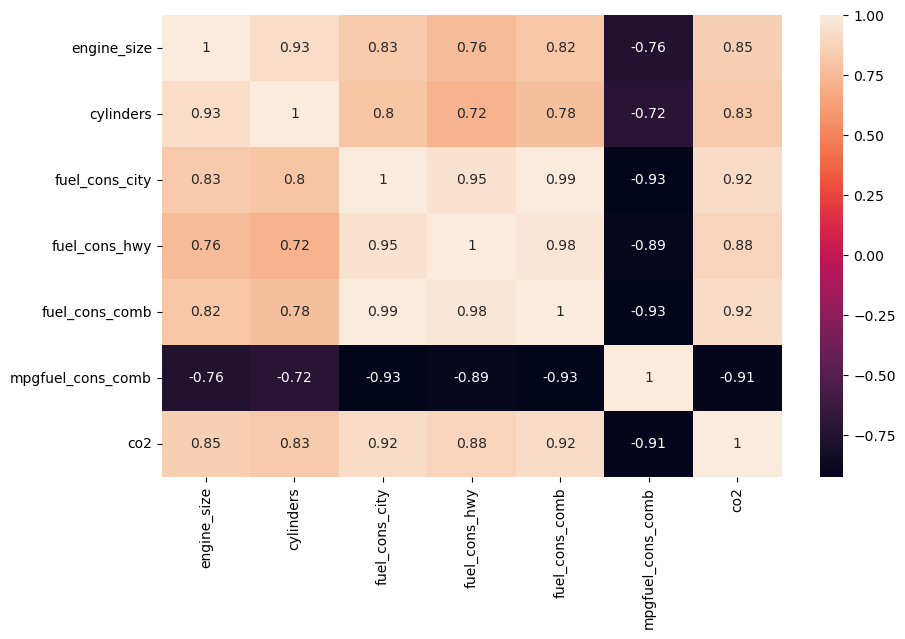

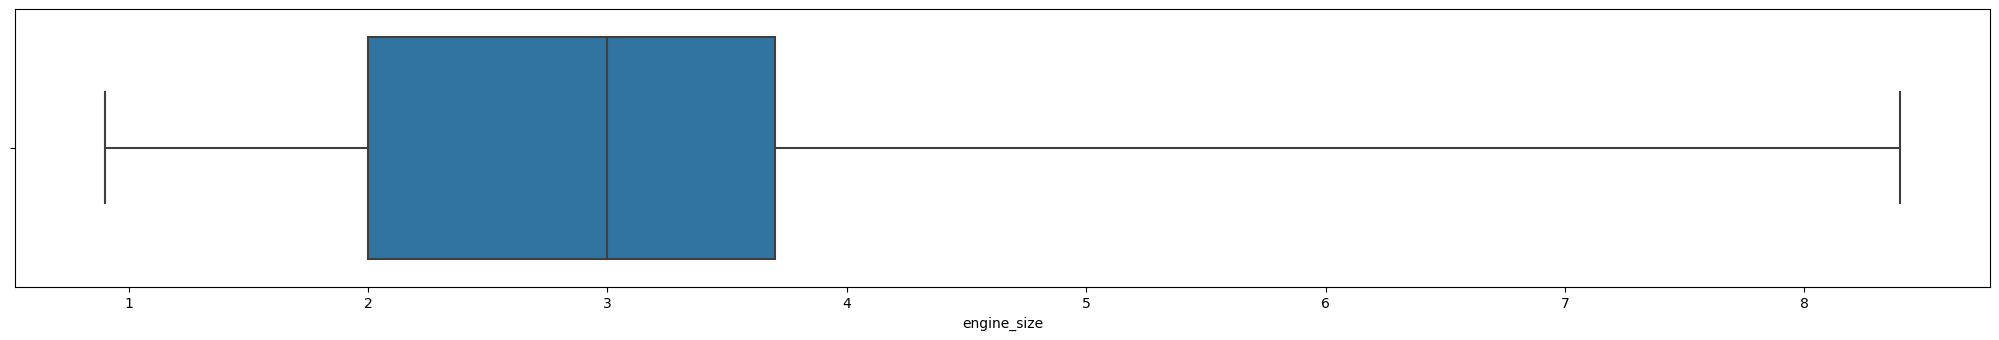

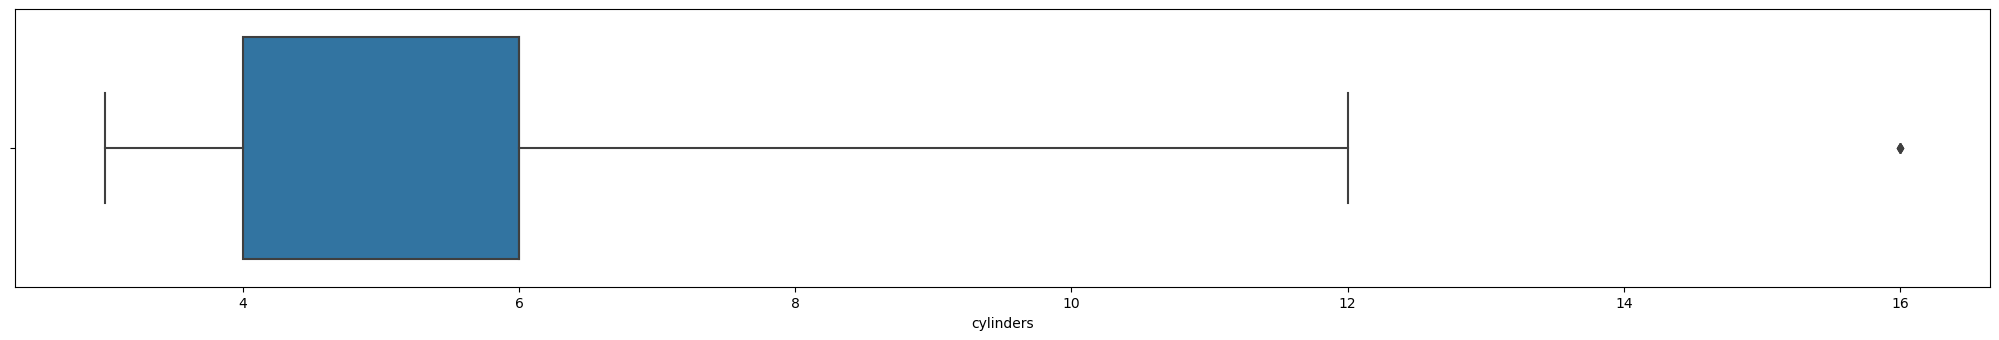

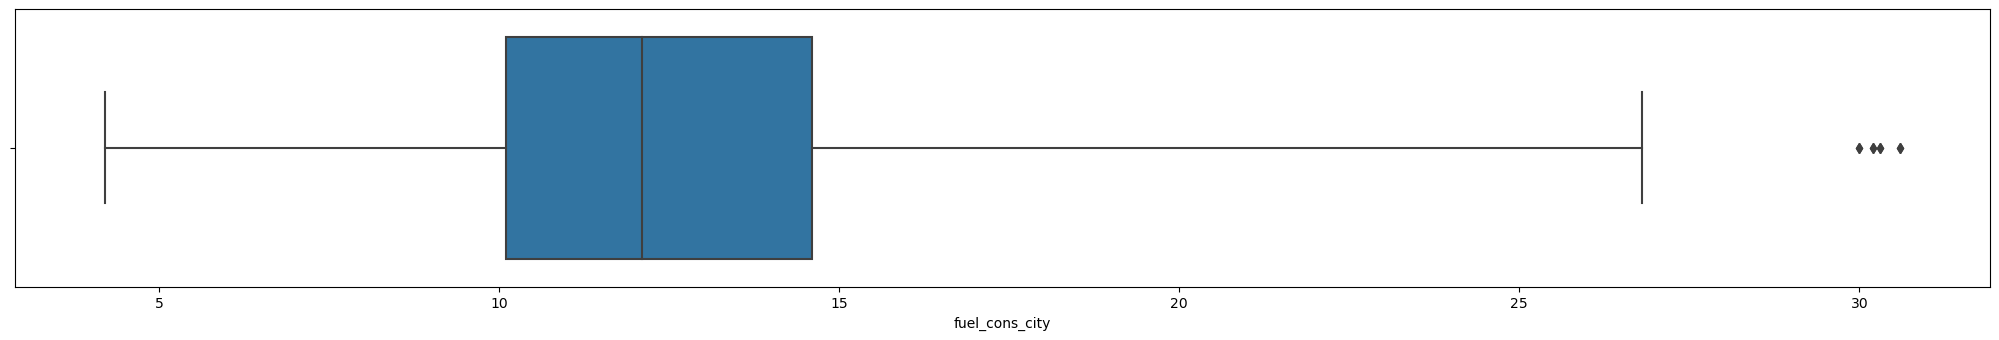

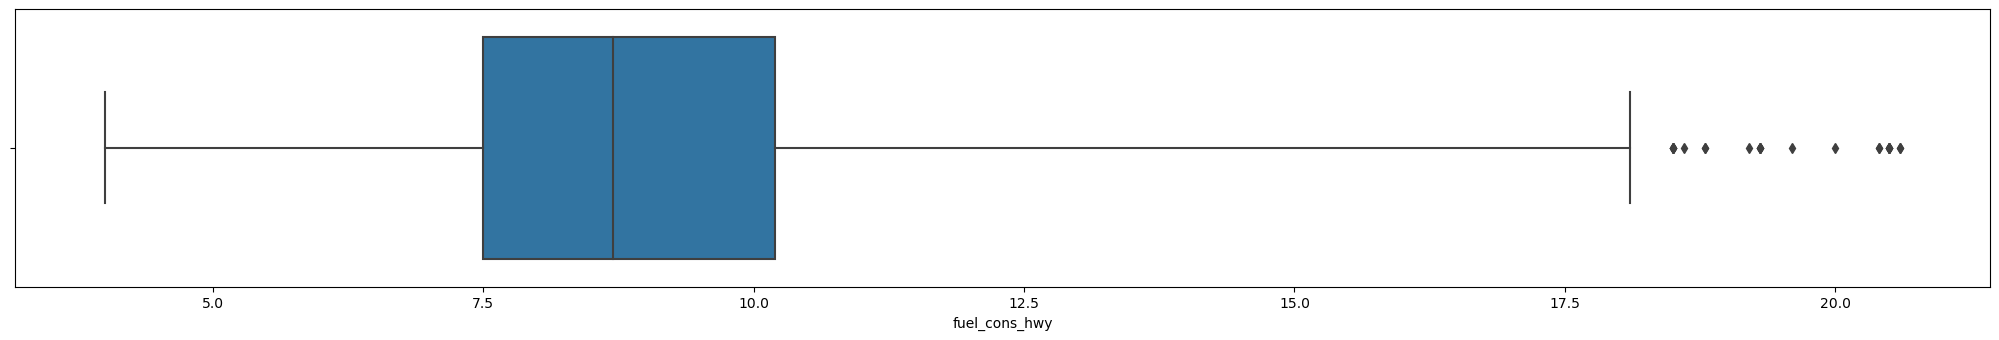

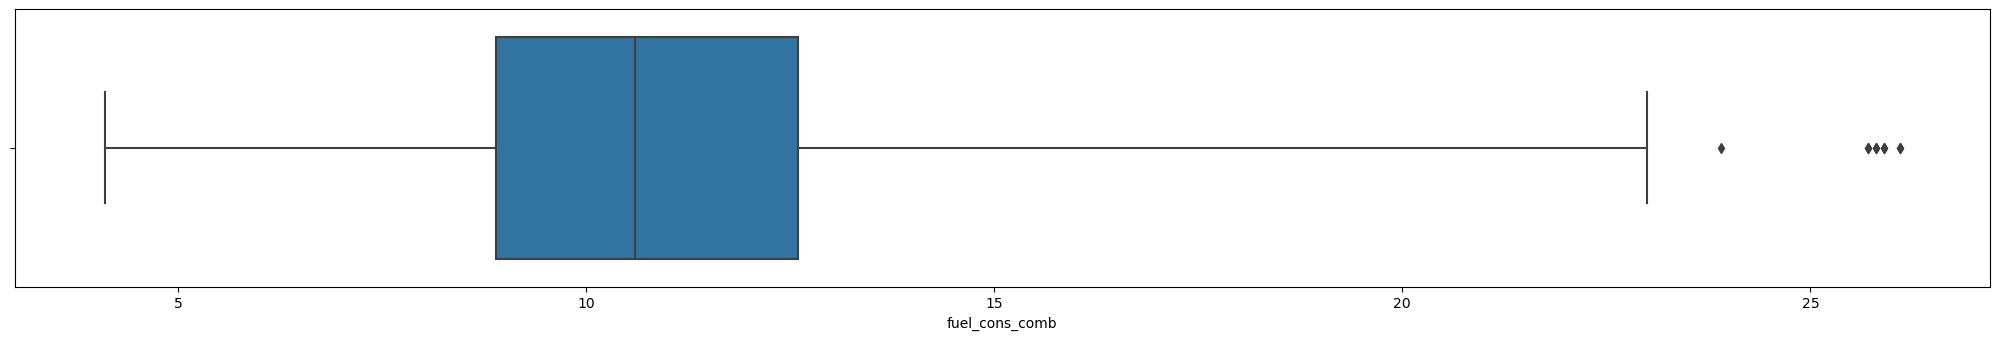

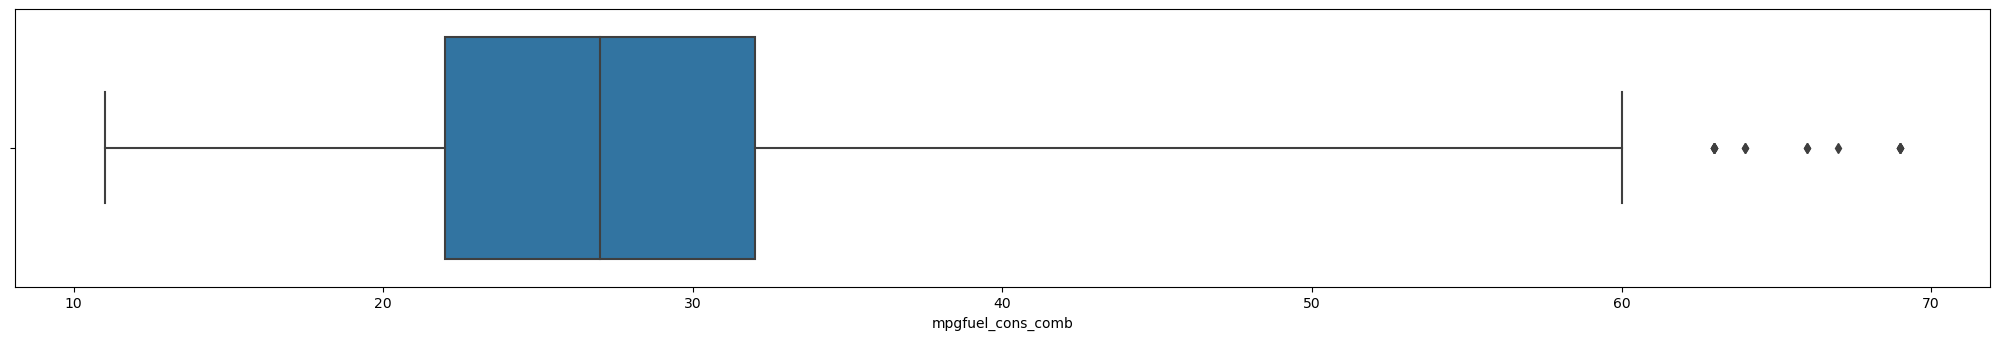

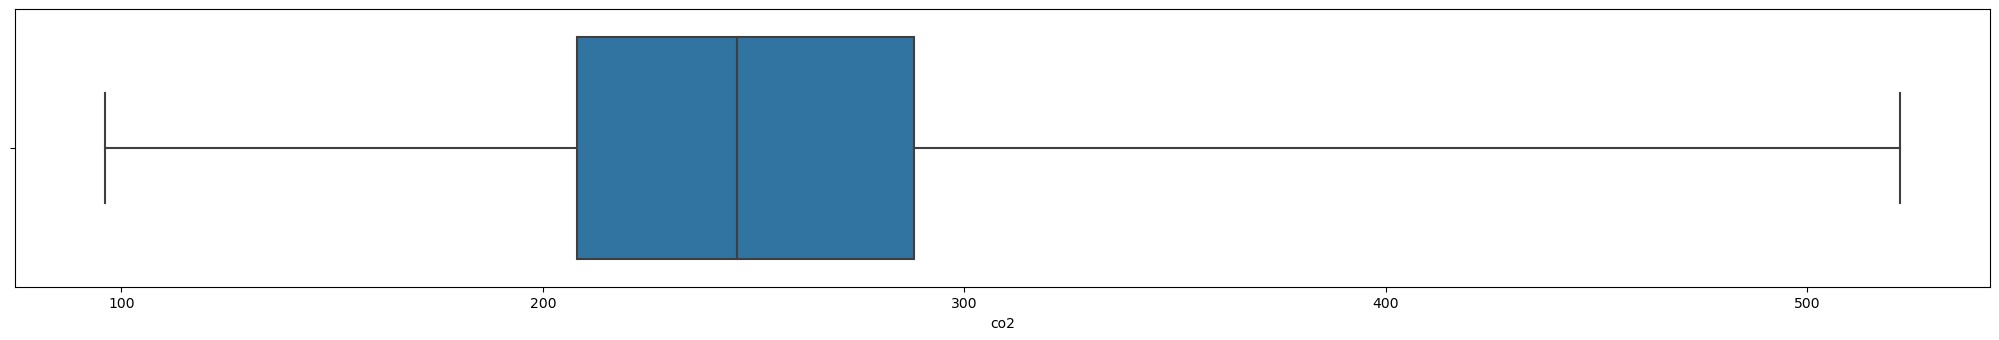

In [180]:
# Let's draw boxplots and histplots for checking distributions of features;
index=0
for feature in df.select_dtypes('number').columns:
    index+=1
    plt.figure(figsize=(40,40))
    plt.subplot((len(df.columns)),2,index)
    sns.boxplot(x=feature,data=df, whis=3) 
        
    plt.tight_layout()
    
    plt.show()

## Data Visulation

In [181]:
for column in ['make', 'model', 'vehicle_class', 'transmission', 'fuel_type']:
    df_column = df[column].value_counts().reset_index().rename(columns={'index': column, column: 'Count'})[0:25]
    df_column = df_column.sort_values(by='Count', ascending=False)  # Değerlere göre sıralama yapiyoruz

    fig = go.Figure(go.Bar(x=df_column[column], y=df_column['Count'], 
                           marker={'color': df_column['Count'], 'colorscale': 'Viridis'}, 
                           text=df_column['Count'], textposition="outside"))
    fig.update_layout(title_text=f'Top 25 {column}', xaxis_title=column, yaxis_title='Number of Vehicles', 
                      title_x=0.5, width=700, height=500)
    fig.show()

In [182]:
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'mpgfuel_cons_comb', 'co2'],
      dtype='object')

### Arac ozelliklerine (features) gore ortalama CO2 emisyonlarina (salinimlarina, dogaya saldiklari egsoz gazi miktarlarina) bakalim

In [183]:
def explore_cat_feature(feature):
    group= df.groupby(feature).mean()
    plt.figure(figsize=[15,5])
    plots = group['co2'].sort_values().plot(kind = 'bar', fontsize=15)
    plt.xlabel(feature, fontsize=15);
    plt.ylabel('Mean Co2 Emission', fontsize=15);
    plt.title("Mean Co2 Emission according to {} feature\n".format(feature), fontsize=20)

In [184]:
for feature in ['make', 'vehicle_class', 'engine_size', 'cylinders', 'transmission', 'fuel_type']:
    explore_cat_feature(feature)

### Engine Size ile CO2 Emission arasindaki iliskiye scatterplot ile bakmak istiyorum;



In [185]:
sns.scatterplot(x="engine_size", y="co2", data=df, hue="fuel_type");

# Simple Linear Regression

## Labelling

In [186]:
X = df[["engine_size"]]
y = df["co2"]

## Train | Test Split (Veri setini egitim ve test kisimlarina ayiralim.) 

In [187]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Scaling the Data

In [188]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler() 

In [189]:
scaler.fit(X_train)  

StandardScaler()

In [190]:
X_train_scaled = scaler.transform(X_train)  
X_train_scaled 

array([[-0.12149345],
       [ 0.6141664 ],
       [-0.12149345],
       ...,
       [ 0.24633648],
       [-0.48932338],
       [ 0.6141664 ]])

In [191]:
X_test_scaled = scaler.transform(X_test) 
X_test_scaled 

array([[-0.12149345],
       [ 0.90843035],
       [ 2.23261809],
       ...,
       [-1.29854922],
       [ 0.24633648],
       [-0.85715331]])

## SIMPLE LIENAR REGRESSION  

y = b0 + b1 * X 

CO2 = b0 + b1 * "engine_size"  

In [192]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [193]:
lin_reg.intercept_ # b0

250.93957345971563

In [194]:
lin_reg.coef_      # b1

array([49.76780749])

In [195]:
b0 = lin_reg.intercept_
b1 = lin_reg.coef_

y = 250.93 + 49.76 * X ......................................................(1)

CO2 = 250.93  + 49.76 * "engine_size" .............................(1)

In [196]:
# Manuel;

y_train_pred =  b0 + b1 * X_train_scaled
y_train_pred

array([[244.89311066],
       [281.5052888 ],
       [244.89311066],
       ...,
       [263.19919973],
       [226.58702159],
       [281.5052888 ]])

In [197]:
#Kodla;

y_train_pred = lin_reg.predict(X_train_scaled)
y_train_pred

array([244.89311066, 281.5052888 , 244.89311066, ..., 263.19919973,
       226.58702159, 281.5052888 ])

In [198]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [199]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    #print("Model testing performance:")
    print("---------------------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [200]:
# Manuel;

y_pred = b1 * X_test_scaled + b0
y_pred

array([[244.89311066],
       [296.15016006],
       [362.05208072],
       ...,
       [186.31362563],
       [263.19919973],
       [208.28093252]])

In [201]:
# Kodla;

y_pred = lin_reg.predict(X_test_scaled)
y_pred

array([244.89311066, 296.15016006, 362.05208072, ..., 186.31362563,
       263.19919973, 208.28093252])

### eval_metrics for "Test Data"

### Train ve Test datalari icin yaptigimiz tahmin sonuclarini "eval_metrics" uzerinden karsilastirmali degerlendirelim; 

In [202]:
print("Simple Linear Model testing performance for TRAIN DATA:")
print(eval_metric(y_train, y_train_pred))

print("---------------------------------------")

print("Simple LinearModel testing performance for TEST DATA:")
print(eval_metric(y_test, y_pred))

Simple Linear Model testing performance for TRAIN DATA:
---------------------------------------
R2_score 	: 0.7245276280573063
MAE 		: 23.374986568616432
MSE 		: 941.7163581594915
RMSE 		: 30.687397383282466
None
---------------------------------------
Simple LinearModel testing performance for TEST DATA:
---------------------------------------
R2_score 	: 0.7238115822302345
MAE 		: 22.92717713434206
MSE 		: 949.9852533375359
RMSE 		: 30.82183079146234
None


#### Eval Metrics icin 2. (Kisa) Yol

Eval metrikleri incelemeyi asagidaki kodlarla yan yana da yapabiliriz.

In [203]:
def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [204]:
simple_linear = train_val(y_train, y_train_pred, y_test, y_pred, "simple")
simple_linear

,simple_train,simple_test
R2,0.724528,0.723812
mae,23.374987,22.927177
mse,941.716358,949.985253
rmse,30.687397,30.821831


## Cross-Validation

In [205]:
from sklearn.model_selection import cross_validate, cross_val_score

In [206]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10) # cv; cross validation demek

In [207]:
# Cross-Validation isleminin her bir step'inde elde edilen skorlari bir arada rapor ettirelim;

pd.DataFrame(scores, index = range(1,11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.001531,0.001259,0.721253,-23.779432,-956.616360,-30.929215
2,0.001111,0.001153,0.693839,-23.571734,-920.157531,-30.334098
3,0.001090,0.001108,0.711604,-24.623101,-1059.180529,-32.545054
4,0.001166,0.001139,0.697387,-23.043243,-924.556910,-30.406527
5,0.001151,0.001064,0.754547,-22.497164,-857.840712,-29.288918
6,0.001291,0.001100,0.712337,-23.154575,-932.875376,-30.543009
7,0.001044,0.001077,0.747016,-22.728297,-910.888084,-30.180923
8,0.001066,0.001077,0.729633,-23.277945,-951.682304,-30.849349
9,0.000995,0.001060,0.707496,-23.459225,-945.678333,-30.751883
10,0.000995,0.001147,0.750757,-23.751550,-968.664775,-31.123380


In [208]:
# Ortalamayi hesaplayabilmek icin;

scores = pd.DataFrame(scores, index=range(1,11)) #0 dan başlatmasın diye 1 verdim indexe
scores.iloc[:, 2:].mean()

test_r2                               0.722587
test_neg_mean_absolute_error        -23.388626
test_neg_mean_squared_error        -942.814091
test_neg_root_mean_squared_error    -30.695236
dtype: float64

In [209]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}
compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,pred,residual
7261,253,244.893111,8.106889
4489,344,296.150160,47.849840
1539,322,362.052081,-40.052081
3532,297,329.101120,-32.101120
6418,308,281.505289,26.494711
3703,406,263.199200,142.800800
5976,242,244.893111,-2.893111
4332,216,208.280933,7.719067
5015,246,222.925804,23.074196
2087,223,226.587022,-3.587022


### Residlere ait bar grafigi

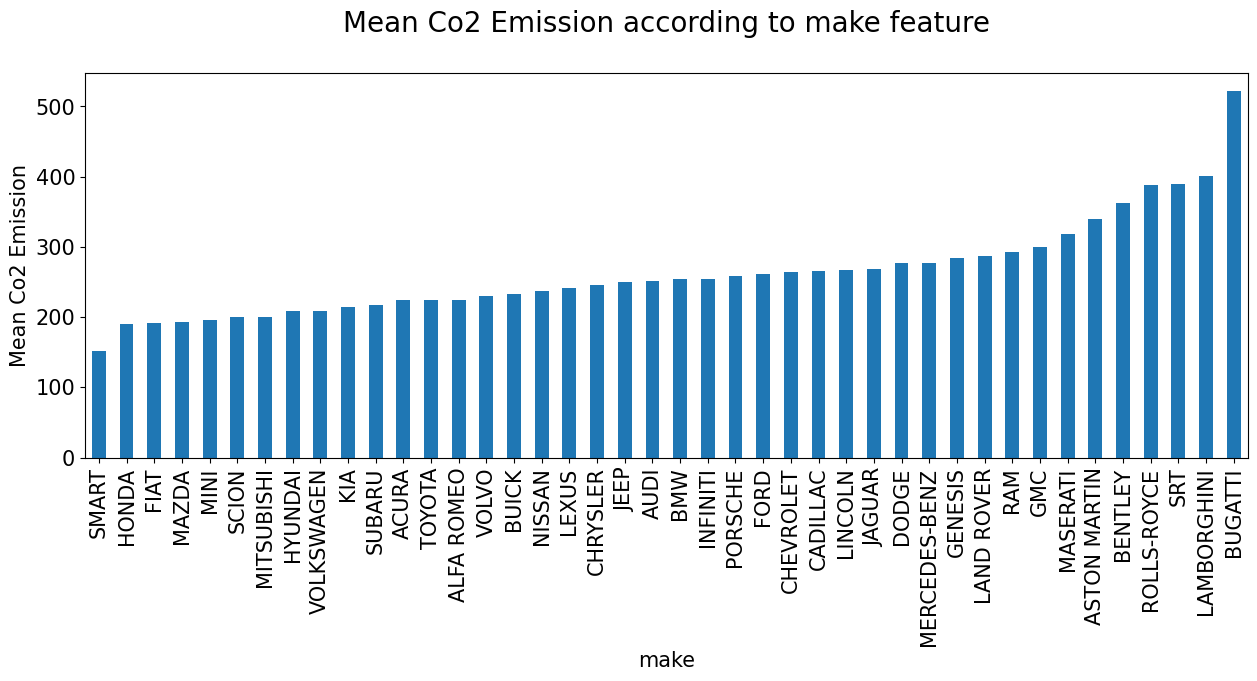

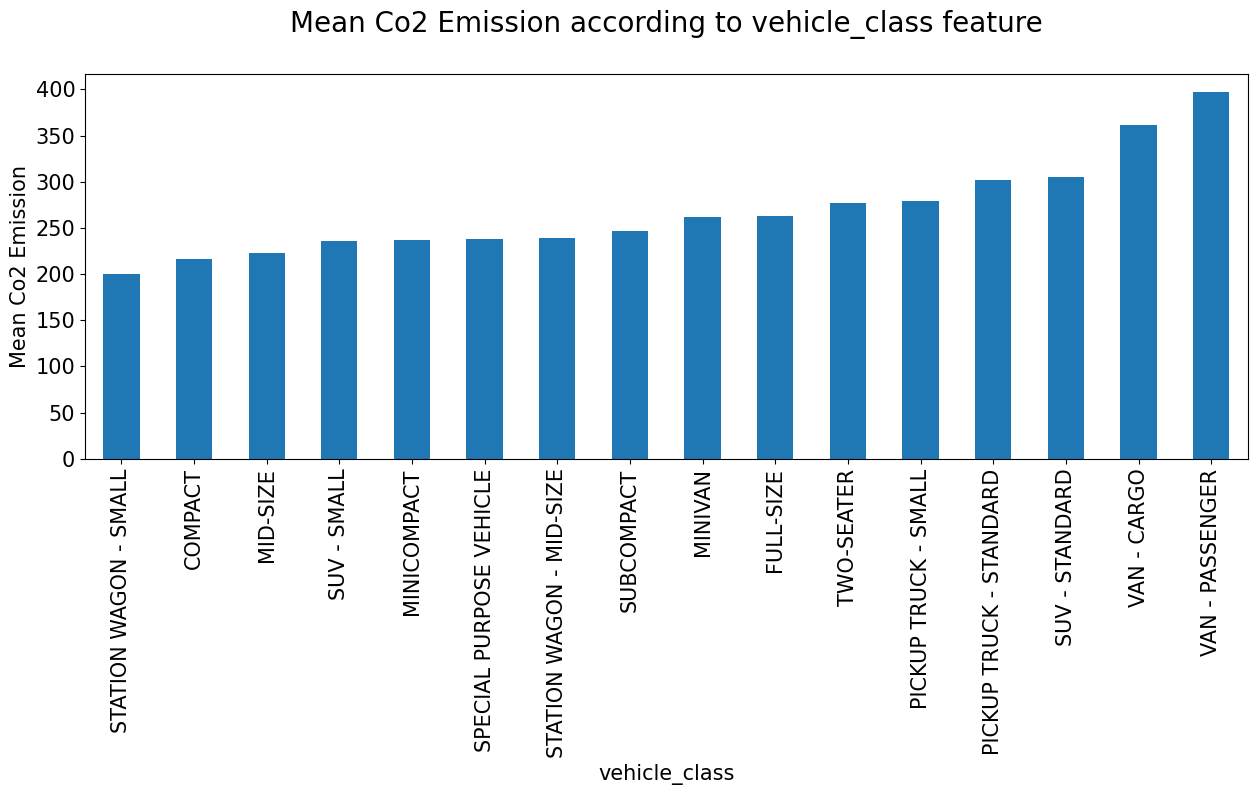

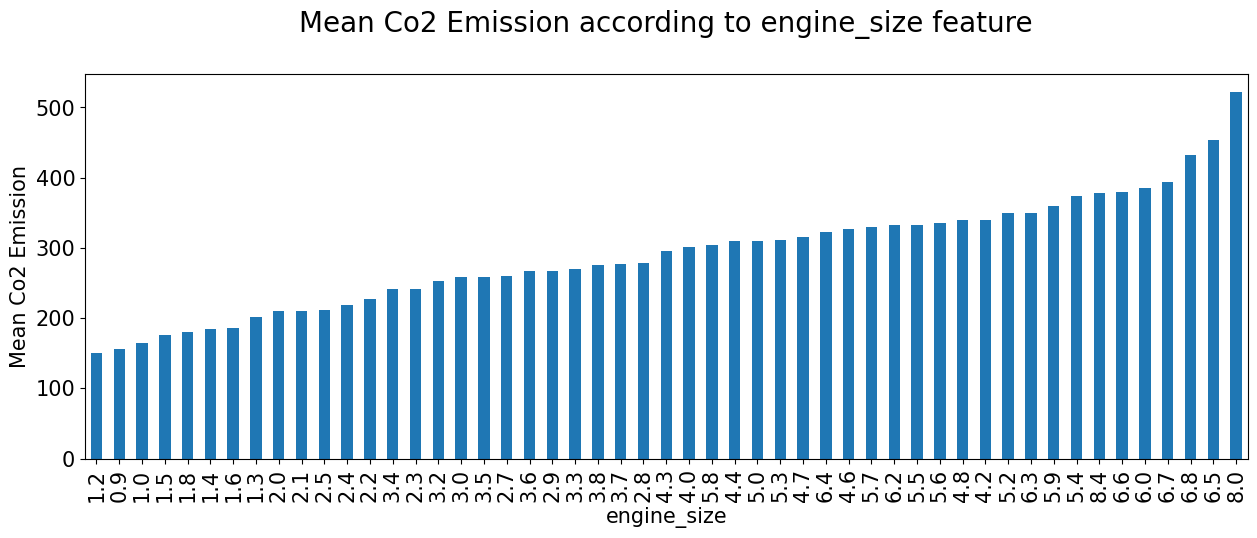

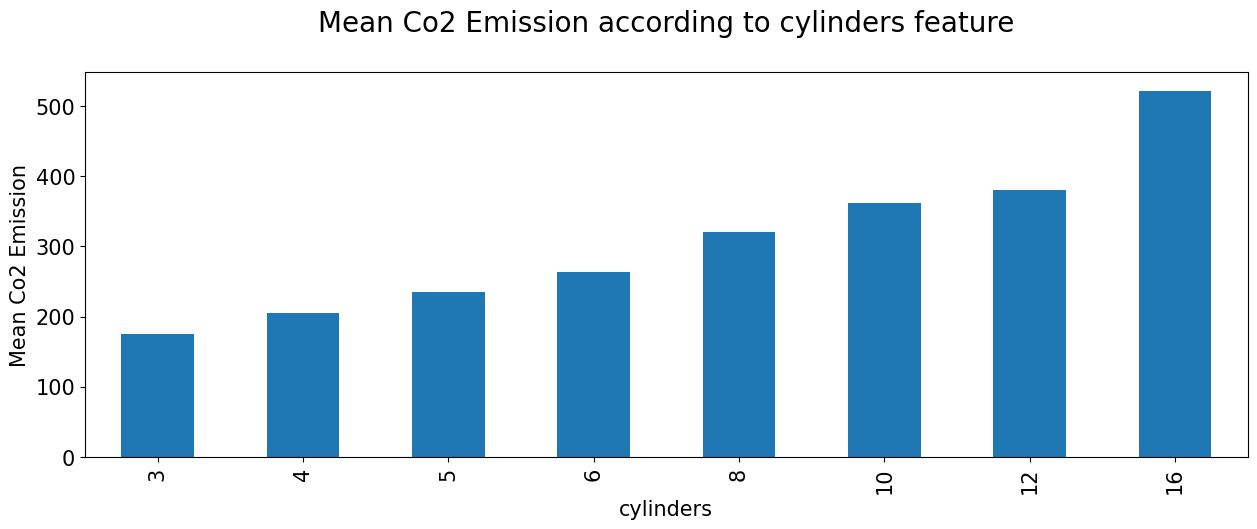

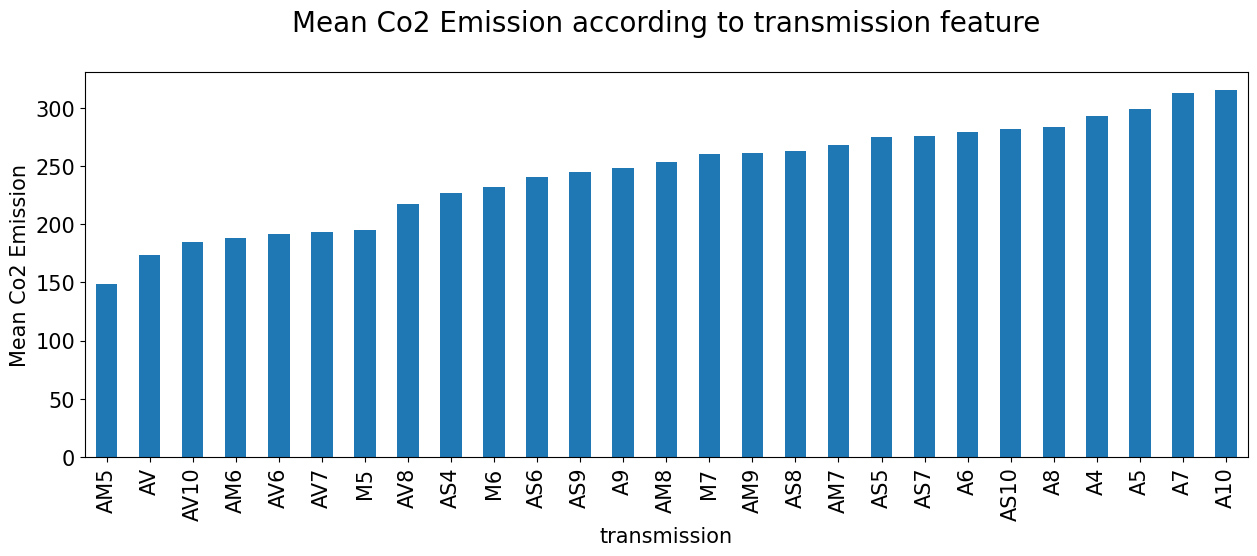

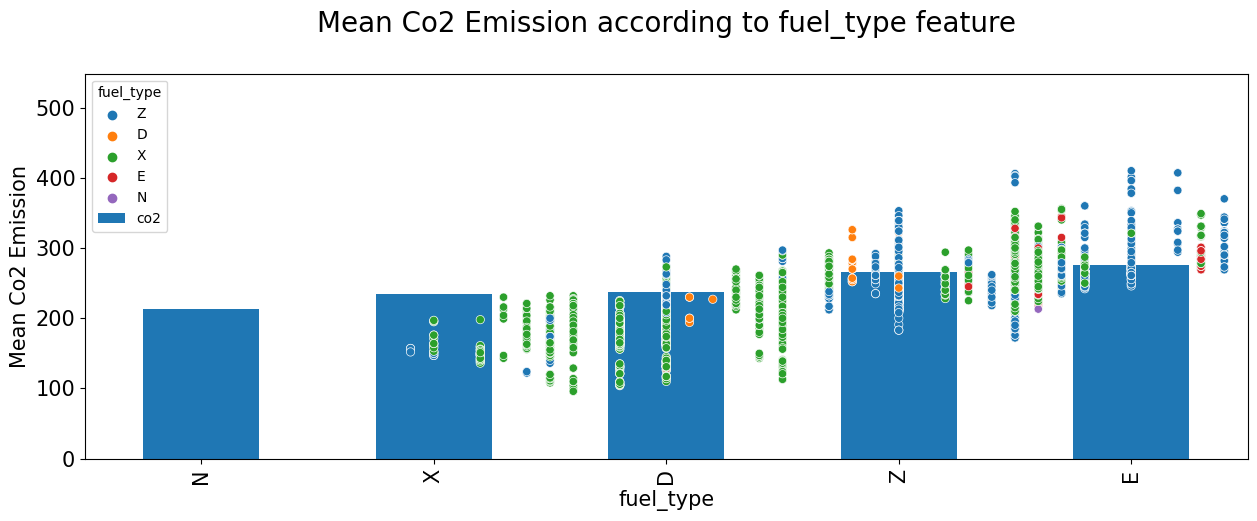

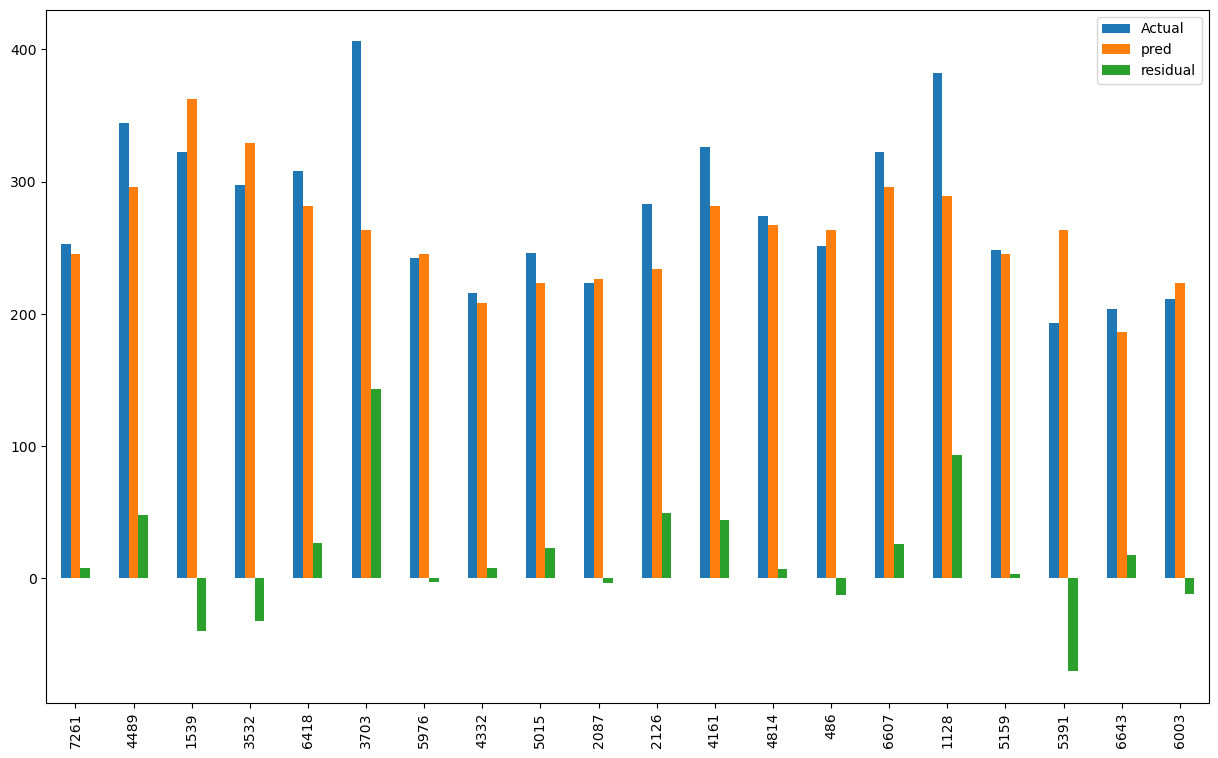

In [210]:
# Bu 20 gozleme ait sonucu gorsellestirelim;

compare.head(20).plot(kind="bar", figsize = (15,9))
plt.show()

In [211]:
residual = y_test - y_pred
residual

7261     8.106889
4489    47.849840
1539   -40.052081
3532   -32.101120
6418    26.494711
          ...    
7185    12.719067
1740    51.719067
4609    -2.313626
1844   -28.199200
5154   -15.280933
Name: co2, Length: 1477, dtype: float64

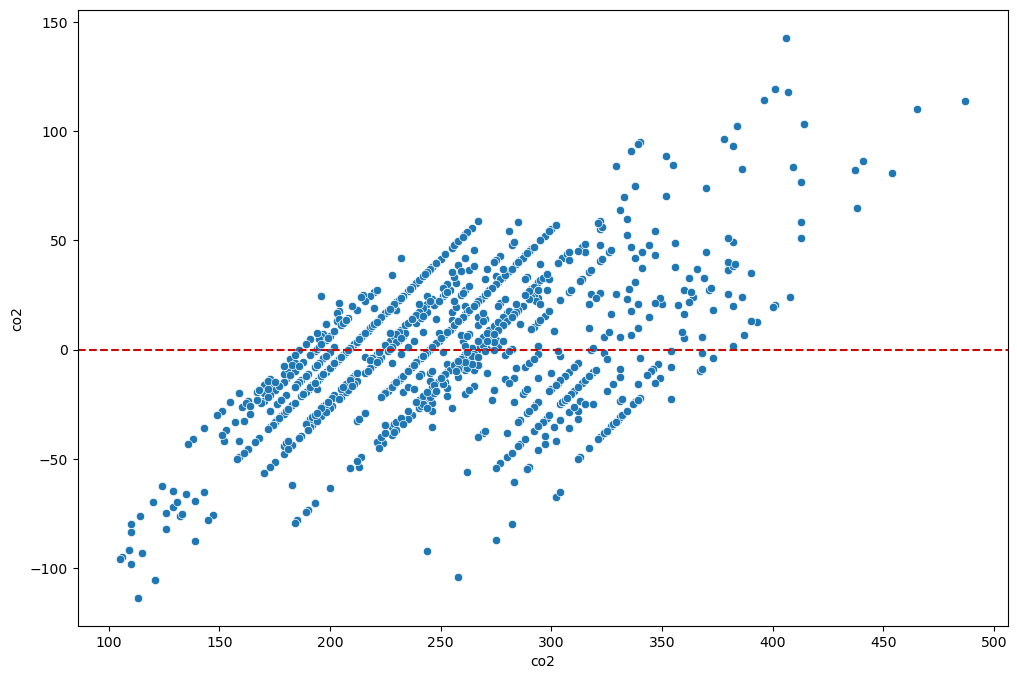

In [212]:
plt.figure(figsize = (12,8))
sns.scatterplot(x=y_test, y=residual)
plt.axhline(y=0, color="r", linestyle = "--")
plt.show()

### Train ve Test datalari icin yaptigimiz tahmin sonuclarini "yellowbrick" kutuphanesi uzerinden gorsel olarak karsilastirmali degerlendirelim;

In [213]:
from yellowbrick.regressor import ResidualsPlot

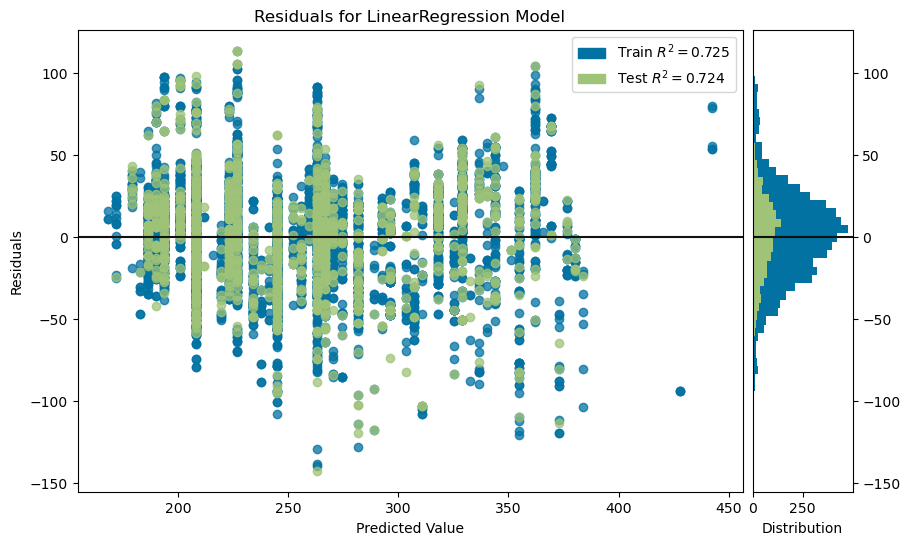

In [214]:
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

### Elde ettigimiz linear regresyon dogrusunu ideal (olmasi gereken) dogru ile karsilastiralim;

In [215]:
from yellowbrick.regressor import PredictionError

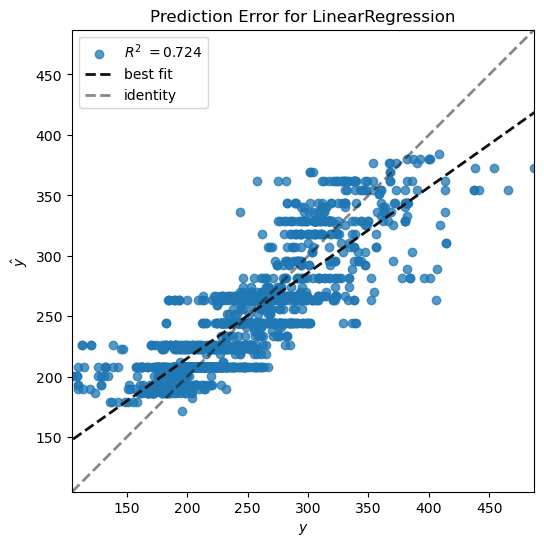

In [216]:
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

# Multiple Linear Regression
## Variables & Model

## Labeling

In [217]:
X = df[["engine_size", "fuel_cons_city", "fuel_cons_hwy", "fuel_cons_comb"]]
y = df["co2"]

## Train | Test Split 

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Scaling the Data  

In [219]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [220]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.12149345, -0.33509065, -0.42937884, -0.37681659],
       [ 0.6141664 ,  0.6072775 ,  0.56440556,  0.59257065],
       [-0.12149345,  0.350268  , -0.02283068,  0.24636092],
       ...,
       [ 0.24633648, -0.24942082, -0.11317471, -0.20371173],
       [-0.48932338, -0.87766626, -0.74558297, -0.82688924],
       [ 0.6141664 ,  0.23604156,  0.47406152,  0.31560287]])

In [221]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.12149345, -0.04952455, -0.02283068, -0.03060686],
       [ 0.90843035,  1.34974937,  1.1516418 ,  1.2849901 ],
       [ 2.23261809,  1.00707004,  1.06129776,  1.04264329],
       ...,
       [-1.29854922, -1.07756253, -1.10695912, -1.10385702],
       [ 0.24633648, -0.1923076 , -0.38420683, -0.27295367],
       [-0.85715331, -0.84910965, -1.10695912, -0.96537313]])

In [222]:
mul_lin_reg = LinearRegression()
mul_lin_reg.fit(X_train_scaled, y_train) 

LinearRegression()

In [223]:
mul_lin_reg.coef_  # b1, b2, b3, b4

array([17.35101748,  8.76846165,  1.14860231, 29.6874299 ])

In [224]:
mul_lin_reg.intercept_ # b0

250.93957345971563

y = 250.93 + 17.35 * X1 +  8.76 * X2 + 1.14 * X3 + 29.68 * X4

** CO2 = 250.93 + 17.35 * "engine_size" + 8.76 * 'fuel_cons_city' + 1.14 * 'fuel_cons_hwy' + 29.68 * 'fuel_cons_comb'

In [225]:
y_train_pred = mul_lin_reg.predict(X_train_scaled)
y_train_pred

array([234.21340724, 285.16105202, 259.19044914, ..., 246.8490547 ,
       209.34893743, 273.57965294])

###  eval_metrics for "Train Data"

### eval_metrics for "Test Data"

### Train ve Test datalari icin yaptigimiz tahmin sonuclarini "eval_metrics" uzerinden karsilastirmali degerlendirelim; 

In [226]:
print("Multiple Linear Model testing performance for TRAIN DATA:")
print(eval_metric(y_train, y_train_pred))

print("---------------------------------------")

print("Multiple Linear Model testing performance for TEST DATA:")
print(eval_metric(y_test, y_pred))

Multiple Linear Model testing performance for TRAIN DATA:
---------------------------------------
R2_score 	: 0.8742483641261991
MAE 		: 13.448848226089453
MSE 		: 429.88838311636425
RMSE 		: 20.733749856607325
None
---------------------------------------
Multiple Linear Model testing performance for TEST DATA:
---------------------------------------
R2_score 	: 0.7238115822302345
MAE 		: 22.92717713434206
MSE 		: 949.9852533375359
RMSE 		: 30.82183079146234
None


### Multiple Linear 'a ait eval metrikler icin 2. Yol: 

In [227]:
multiple_linear = train_val(y_train, y_train_pred, y_test, y_pred, "multi")
multiple_linear

,multi_train,multi_test
R2,0.874248,0.723812
mae,13.448848,22.927177
mse,429.888383,949.985253
rmse,20.733750,30.821831


## Cross Validation

In [228]:

from sklearn.model_selection import cross_validate, cross_val_score

In [229]:

model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10) # cv; cross validation demek

In [230]:
# CV'nin her asamasinda elde edilen metrikleri gorelim;

pd.DataFrame(scores, index = range(1,11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.002992,0.001427,0.869205,-13.739786,-448.866468,-21.186469
2,0.002341,0.001543,0.874288,-12.853381,-377.823054,-19.437671
3,0.002553,0.001653,0.872704,-13.885354,-467.513717,-21.622066
4,0.002230,0.001279,0.859309,-13.398961,-429.844668,-20.732696
5,0.002183,0.001870,0.859484,-14.101987,-491.092260,-22.160602
6,0.002221,0.001243,0.855050,-13.669038,-470.066559,-21.681018
7,0.002219,0.001288,0.896184,-12.855013,-373.795711,-19.333797
8,0.002205,0.001267,0.880169,-13.352262,-421.798912,-20.537744
9,0.002184,0.001266,0.886689,-12.778562,-366.340205,-19.140016
10,0.002217,0.001302,0.880513,-14.003984,-464.375036,-21.549363


In [231]:
# Bu ,metriklerin ortalamasini hesaplayalim; 

scores = pd.DataFrame(scores, index=range(1,11)) #0 dan başlatmasın diye 1 verdim indexe
scores.iloc[:, 2:].mean()

test_r2                               0.873360
test_neg_mean_absolute_error        -13.463833
test_neg_mean_squared_error        -431.151659
test_neg_root_mean_squared_error    -20.738144
dtype: float64

In [232]:
result_compare = pd.concat([simple_linear, multiple_linear], axis=1)
result_compare

,simple_train,simple_test,multi_train,multi_test
R2,0.724528,0.723812,0.874248,0.723812
mae,23.374987,22.927177,13.448848,22.927177
mse,941.716358,949.985253,429.888383,949.985253
rmse,30.687397,30.821831,20.733750,30.821831


## Test datalari icin yaptigimiz tahmin sonucunda elde ettigimiz residleri incleyelim;

In [233]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual": y_test - y_pred}
compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,Pred,Residual
7261,253,244.893111,8.106889
4489,344,296.150160,47.849840
1539,322,362.052081,-40.052081
3532,297,329.101120,-32.101120
6418,308,281.505289,26.494711
3703,406,263.199200,142.800800
5976,242,244.893111,-2.893111
4332,216,208.280933,7.719067
5015,246,222.925804,23.074196
2087,223,226.587022,-3.587022


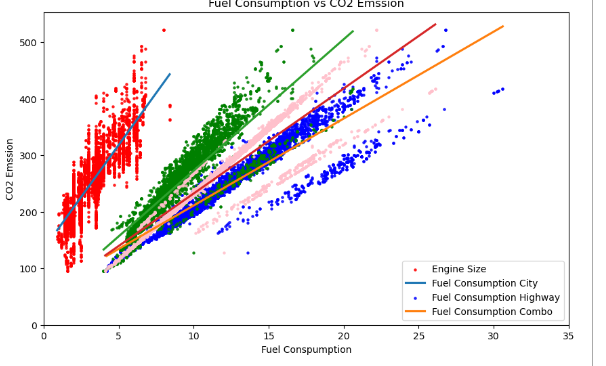

### Residlere ait bar grafigi

In [234]:
#Grafigi default ayarlara dondurmek icin;

plt.rcParams.update(plt.rcParamsDefault)

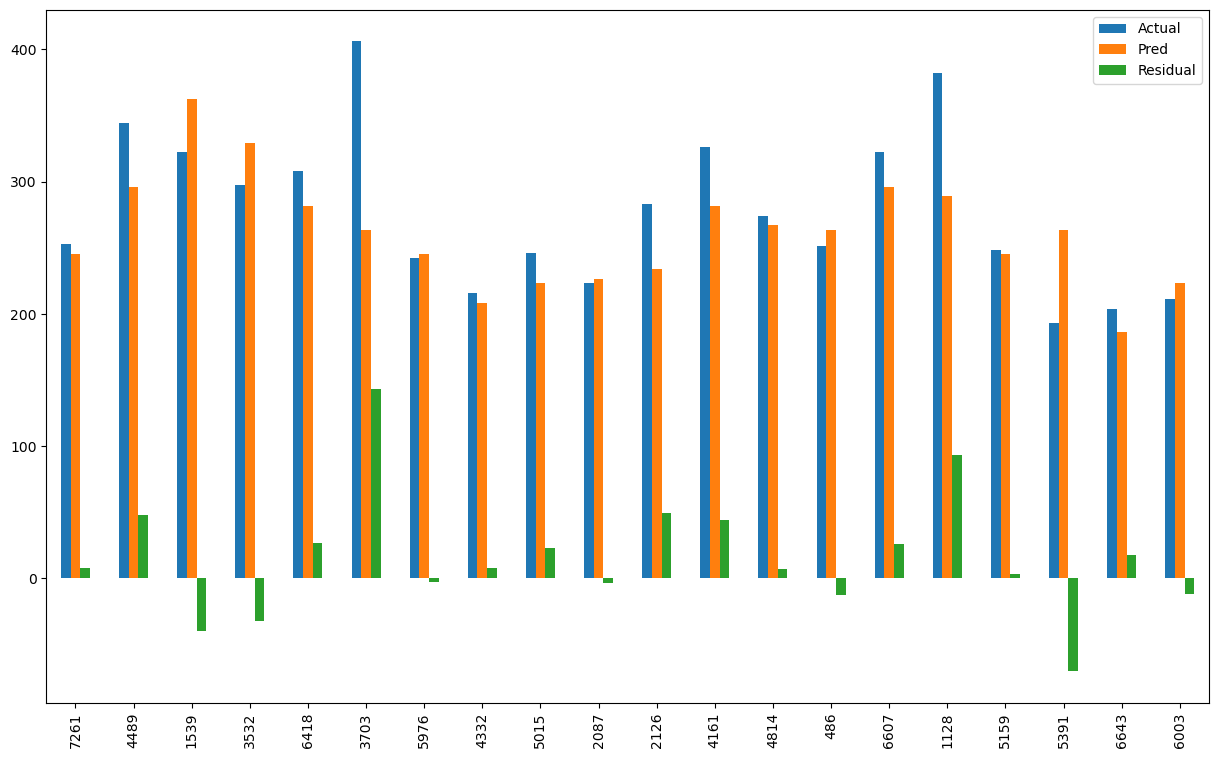

In [235]:
# Bu 20 gozleme ait sonucu gorsellestirelim;

compare.head(20).plot(kind="bar", figsize = (15,9))
plt.show()

### Residlere ait dagilim grafigi

In [236]:
residual = y_test - y_pred
residual

7261     8.106889
4489    47.849840
1539   -40.052081
3532   -32.101120
6418    26.494711
          ...    
7185    12.719067
1740    51.719067
4609    -2.313626
1844   -28.199200
5154   -15.280933
Name: co2, Length: 1477, dtype: float64

In [237]:
residual.sum().round()

-1247.0

In [238]:
#Grafigi default ayarlara dondurmek icin;

plt.rcParams.update(plt.rcParamsDefault)

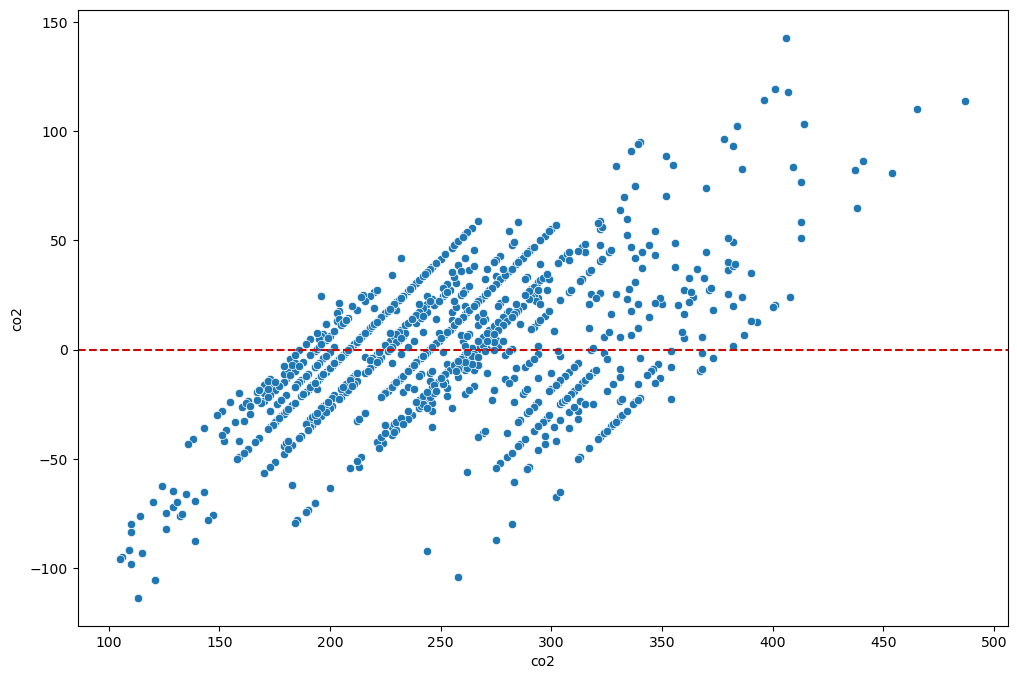

In [239]:
# Bu residleri gorsellestirelim;

plt.figure(figsize = (12,8))
sns.scatterplot(x=y_test, y = residual)
plt.axhline(y=0, color="r", linestyle = "--")
plt.show()

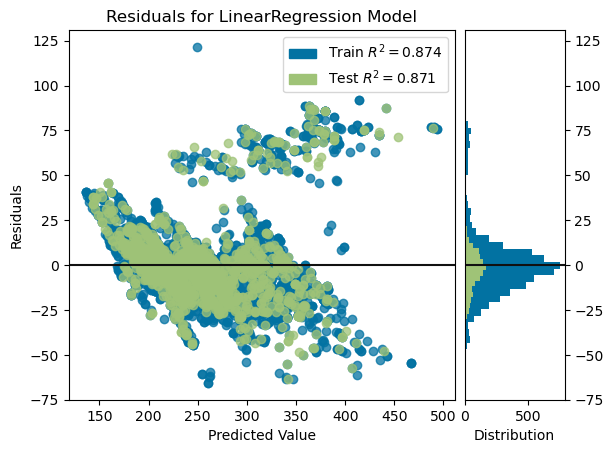

In [240]:
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show();

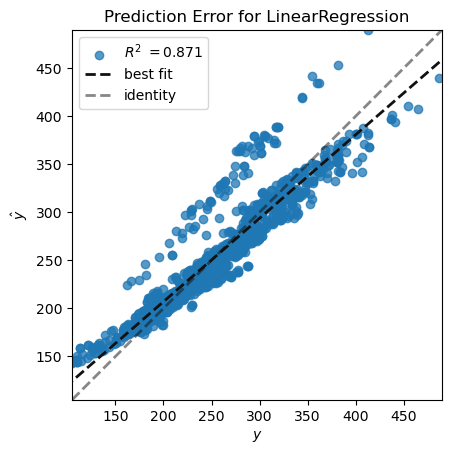

In [241]:
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

# FINAL MODEL  

In [242]:

X = df[["engine_size","fuel_cons_city","fuel_cons_hwy", "fuel_cons_comb"]]
y = df["co2"]

In [243]:
scaler.fit(X)

StandardScaler()

In [244]:
X_scaled = scaler.transform(X)
X_scaled

array([[-0.85672099, -0.75900153, -1.05278069, -0.85574185],
       [-0.5613172 , -0.3875769 , -0.60320221, -0.47542306],
       [-1.22597573, -1.87327544, -1.45740132, -1.75467716],
       ...,
       [-0.85672099, -0.24472127, -0.19858158, -0.23340202],
       [-0.85672099, -0.3875769 , -0.33345513, -0.37169976],
       [-0.85672099, -0.10186564, -0.15362374, -0.09510428]])

In [245]:
# Multiple Linear Reg Mod' full data ile tahmin edelim; 

final_model = LinearRegression()
final_model.fit(X_scaled, y)


LinearRegression()

In [246]:
final_model.intercept_  # b0

250.58469871360867

In [247]:
final_model.coef_  # b1, b2, ...

array([17.38343034, 10.41272044,  1.85035122, 27.35410658])

In [248]:
y_pred_final = final_model.predict(X_scaled)
y_pred_final

array([202.43261059, 222.67044135, 159.07281134, ..., 226.39178562,
       220.87169534, 231.74550027])

In [249]:
# Gercek degerler (actual), tahmin edlien degerler (pred) ve residlere bakalim; 

my_dict = {"Actual": y, "pred": y_pred_final, "residual": y - y_pred_final}
compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,pred,residual
0,196,202.432611,-6.432611
1,221,222.670441,-1.670441
2,136,159.072811,-23.072811
3,255,256.605520,-1.605520
4,244,249.758986,-5.758986
5,230,242.657585,-12.657585
6,232,243.638586,-11.638586
7,255,259.387401,-4.387401
8,267,266.317123,0.682877
9,212,216.936036,-4.936036


In [250]:
print("Model testing performance: ")
eval_metric(compare.Actual, compare.pred)

Model testing performance: 
---------------------------------------
R2_score 	: 0.8736921162216666
MAE 		: 13.485021232564419
MSE 		: 432.3859947912395
RMSE 		: 20.793893209094815


**YORUM:** Final modelmizin basari duzeyi %87 olup, iyi bir seviyededir. MAE ve RMSE degerlerinin dusuk olmasi iyi iken, bu iki deger arasindaki farkin fazlaligi; veri seinde outlier degerler oldugunu dusundurmektedir. 

## Modelin Dogruluk Duzeyinin Hesaplanmasi

In [251]:
# Once target variablenin ortalamasini alalim.

avg_em = df['co2'].mean()
avg_em 

250.58469871360867

In [252]:
# Final Modlein RMSE degerini hesaplayalim;

rmse = np.sqrt(mean_squared_error(y, y_pred_final))
rmse

20.793893209094815

In [253]:
oran = rmse / avg_em
oran

0.08298149614019329

# Project Part 2

In [254]:
# X = df[["engine_size", "fuel_cons_city", "fuel_cons_hwy", "fuel_cons_comb"]]
# y = df["co2"]

## Polynomial Convertion

In [255]:
from sklearn.preprocessing import PolynomialFeatures

In [256]:
polynomial_converter = PolynomialFeatures(degree = 6, include_bias = False) ## Datamı overfit li hale getiriyorum (overfitting'i anlatmak için)

poly_features = polynomial_converter.fit_transform(X)

In [257]:
poly_features.shape

(7385, 209)

In [258]:
poly_features

array([[2.00000000e+00, 9.90000000e+00, 6.70000000e+00, ...,
        2.34328606e+05, 2.97282559e+05, 3.77149516e+05],
       [2.40000000e+00, 1.12000000e+01, 7.70000000e+00, ...,
        5.03577575e+05, 6.27836977e+05, 7.82757790e+05],
       [1.50000000e+00, 6.00000000e+00, 5.80000000e+00, ...,
        4.07628024e+04, 4.14656093e+04, 4.21805336e+04],
       ...,
       [2.00000000e+00, 1.17000000e+01, 8.60000000e+00, ...,
        8.32426316e+05, 9.96975704e+05, 1.19405230e+06],
       [2.00000000e+00, 1.12000000e+01, 8.30000000e+00, ...,
        6.61754591e+05, 7.89321741e+05, 9.41480149e+05],
       [2.00000000e+00, 1.22000000e+01, 8.70000000e+00, ...,
        9.92141500e+05, 1.22022001e+06, 1.50073035e+06]])

## Train | Test Split

In [259]:
X_train, X_test, y_train, y_test = train_test_split(poly_features,
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=101)

## Best Degree for Polynomial

In [260]:
def poly(d): 
    
    train_rmse_errors = [] 
    test_rmse_errors = []
    number_of_features = []
    
    for i in range(1, d):
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False)
        poly_features = polynomial_converter.fit_transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
        
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
        number_of_features.append(poly_features.shape[1])
        
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors, "number of features":number_of_features}, 
                        index=range(1,d))

In [261]:
poly(10)

,train_rmse_errors,test_rmse_errors,number of features
1,20.855262,20.665769,4
2,16.661711,16.560362,14
3,15.820798,15.626022,34
4,14.199758,14.116195,69
5,13.517680,15.301691,125
6,12.263087,46.326154,209
7,11.062236,142.215930,329
8,10.953009,113.144298,494
9,31.455441,723.456006,714


## Scaling

In [262]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Linear Regression Model

In [263]:
lm = LinearRegression() #lm linear regresyon değişkeni

In [264]:
lm.fit(X_train_scaled, y_train) 

#x trainin scaled datasını verdim yani scale edilmiş datayı verdim.

LinearRegression()

In [265]:
y_pred = lm.predict(X_test_scaled) # y_pred alırken yine scaled edilmiş test ve train datalarını alıyoruz
y_train_pred = lm.predict(X_train_scaled)

In [266]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear") #modelin adı
ls      # R2 scorunda train ve test arasında varyans farkı çok fazla
# overfiting sözkonusu

,linear_train,linear_test
R2,0.956799,0.809925
mae,6.126112,7.322106
mse,148.717262,635.170767
rmse,12.194969,25.202594


##### poly degree 5
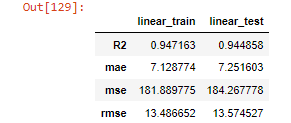

## Multicolineratiy

In [267]:
def color_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: green'` for positive
    strings, black otherwise.
    """
    if val > 0.90 and val <0.99:
        color = 'red'
    elif val >= 1:
        color = 'blue'
    else:
        color = 'black'
    return f'color : {color}'

In [268]:
# pd.DataFrame(poly_features).corr().style.applymap(color_red)

## Cross Validation

In [269]:
from sklearn.model_selection import cross_validate, cross_val_score 

In [270]:
model = LinearRegression() ## Model sıfırlama
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 
                                                                   'neg_mean_absolute_error',
                                                                   'neg_mean_squared_error',
                                                                   'neg_root_mean_squared_error'], 
                        cv = 5)

In [271]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.047186,0.001987,-10.296236,-13.147276,-39352.125755,-198.373702
2,0.087138,0.002579,-0.075572,-9.653747,-3688.189631,-60.730467
3,0.090402,0.002470,0.899121,-6.865148,-331.146683,-18.197436
4,0.083129,0.002086,0.854828,-7.847937,-511.962906,-22.626597
5,0.059020,0.002183,0.810510,-8.216534,-656.156592,-25.615554


In [272]:
scores = pd.DataFrame(scores, index=range(1, 6)) #0 dan başlatmasın diye 1 verdim indexe
scores.iloc[:, 2:].mean()

test_r2                               -1.561470
test_neg_mean_absolute_error          -9.146128
test_neg_mean_squared_error        -8907.916313
test_neg_root_mean_squared_error     -65.108751
dtype: float64

In [273]:
lm.coef_

array([ 2.92508133e+02,  1.45468328e+04,  6.52572251e+03, -2.02855789e+04,
       -2.16321412e+03,  1.06578401e+05,  3.83788104e+04, -1.41353148e+05,
       -2.21065730e+06, -2.27518379e+06,  6.43713993e+06, -6.08885861e+05,
        3.37643730e+06, -4.72586237e+06,  5.11766569e+03, -3.66102254e+05,
       -1.97173070e+05,  5.65713839e+05,  4.88635454e+06,  3.89039849e+06,
       -1.36562348e+07,  8.25736095e+05, -5.44707293e+06,  9.48178535e+06,
        1.57296198e+07,  3.27976078e+07, -6.65225449e+07,  1.85816744e+07,
       -8.72808566e+07,  8.98228812e+07,  2.78461016e+06, -2.25177920e+07,
        5.43510177e+07, -3.77200791e+07, -9.33454043e+03,  2.92761755e+03,
       -4.13226205e+04,  4.71937518e+04,  7.95135206e+06,  1.09015866e+07,
       -2.49964121e+07,  3.52929343e+06, -1.68634827e+07,  1.94601171e+07,
       -4.41998264e+08, -6.81363028e+08,  1.96502560e+09, -3.52513736e+08,
        2.02533927e+09, -2.91613898e+09, -6.15959047e+07,  5.26211278e+08,
       -1.50795301e+09,  

In [274]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,2.925081e+02
1,1.454683e+04
2,6.525723e+03
3,-2.028558e+04
4,-2.163214e+03
...,...
204,5.588863e+11
205,-1.452451e+12
206,1.948174e+12
207,-1.142040e+12


## Regularizasyon
### Ridge Regression (L2)

In [275]:
from sklearn.linear_model import Ridge, RidgeCV

In [276]:
ridge_model = Ridge(alpha=1, random_state=42)

In [277]:
ridge_model.fit(X_train_scaled, y_train) #scale edilen X_train ve y_train fit ederiz

Ridge(alpha=1, random_state=42)

In [278]:
y_pred = ridge_model.predict(X_test_scaled)        
y_train_pred = ridge_model.predict(X_train_scaled)

In [279]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge") # train_val fonksiyonua tahmin ve testleri veriyoruz
rs

,ridge_train,ridge_test
R2,0.935884,0.938935
mae,7.501423,7.342883
mse,220.717141,204.060017
rmse,14.856552,14.284958


In [280]:
pd.concat([ls, rs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.956799,0.809925,0.935884,0.938935
mae,6.126112,7.322106,7.501423,7.342883
mse,148.717262,635.170767,220.717141,204.060017
rmse,12.194969,25.202594,14.856552,14.284958


In [281]:
model = Ridge(alpha = 1, random_state = 42)
scores = cross_validate(model, X_train_scaled, y_train,
                      scoring=['r2', 'neg_mean_absolute_error',
                               'neg_mean_squared_error',
                               'neg_root_mean_squared_error'], 
                        cv=5)

In [282]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.021363,0.002713,0.934318,-7.711020,-228.814160,-15.126604
2,0.026015,0.002656,0.940258,-7.408614,-204.857620,-14.312848
3,0.026212,0.002563,0.940828,-7.016463,-194.241129,-13.937042
4,0.027235,0.002586,0.937700,-7.565039,-219.705619,-14.822470
5,0.026572,0.002581,0.920110,-8.052654,-276.637425,-16.632421


In [283]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:, 2:].mean()

test_r2                               0.934643
test_neg_mean_absolute_error         -7.550758
test_neg_mean_squared_error        -224.851191
test_neg_root_mean_squared_error    -14.966277
dtype: float64

In [284]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge") ## Overfitting sorunu çözüldü

,ridge_train,ridge_test
R2,0.935884,0.938935
mae,7.501423,7.342883
mse,220.717141,204.060017
rmse,14.856552,14.284958


In [285]:
ridge_model.coef_

array([-6.73922856e+00,  2.11439347e+01, -1.43152541e+01,  1.94977598e+01,
       -2.35524854e+01,  1.60758500e+01,  1.02697922e+01,  1.68144207e+01,
        2.50666934e+00,  2.03416885e+01,  1.42393397e+01,  2.26696654e+01,
        2.65205137e+01,  2.43849260e+01, -1.59897347e+01, -8.77945176e-01,
       -2.21447414e+01, -8.13463501e+00,  1.30119237e+01,  1.54989904e+01,
        1.53653369e+01,  1.30155349e+01,  1.59231348e+01,  1.71543803e+01,
       -2.67100743e+01, -1.58149888e+01, -1.95725165e+01, -3.57276583e-01,
       -7.13737881e+00, -1.16990908e+01,  9.41045883e+00,  6.15843615e+00,
        9.57366749e-01, -3.55263646e+00,  9.18927306e+00,  1.50202895e+00,
       -2.67162778e+01, -9.28517491e+00,  8.29807933e+00, -1.12333935e-01,
        4.90525504e+00, -1.42755100e+01, -5.80060709e+00,  7.03497054e-01,
        7.65201403e+00,  3.71688161e+00,  6.79851348e+00,  2.89565216e+00,
        3.77949653e+00,  6.32144666e+00,  6.24568748e-02,  2.08957870e+00,
        3.60654398e+00,  

In [286]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [287]:
pd.concat([lm_df, rm_df], axis = 1)

,lm_coef,ridge_coef_1
0,2.925081e+02,-6.739229
1,1.454683e+04,21.143935
2,6.525723e+03,-14.315254
3,-2.028558e+04,19.497760
4,-2.163214e+03,-23.552485
...,...,...
204,5.588863e+11,14.221453
205,-1.452451e+12,6.663929
206,1.948174e+12,2.113422
207,-1.142040e+12,1.566546


### Choosing best alpha value with Cross-Validation

In [288]:
alpha_space = np.linspace(0.01, 1, 100) #bir kere oluştur her modelde kullan mantığıyla alpha space i oluşturduk
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [289]:
ridge_cv_model = RidgeCV(alphas = alpha_space, 
                         cv = 5, 
                         scoring = "neg_root_mean_squared_error")

In [290]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [291]:
ridge_cv_model.alpha_

0.01

In [292]:
ridge_cv_model.best_score_

-14.436861410443242

In [293]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [294]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.941857,0.944442
mae,7.158586,7.015880
mse,200.153304,185.656271
rmse,14.147555,13.625574


In [295]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.956799,0.809925,0.935884,0.938935,0.941857,0.944442
mae,6.126112,7.322106,7.501423,7.342883,7.158586,7.015880
mse,148.717262,635.170767,220.717141,204.060017,200.153304,185.656271
rmse,12.194969,25.202594,14.856552,14.284958,14.147555,13.625574


In [296]:
ridge_cv_model.coef_

array([  65.4921925 ,  -11.59687551,  -58.64696126,  -96.37560287,
        111.46531751, -267.99101683, -151.35460739, -166.46606322,
        243.45710872,   62.15722624,  185.25506125,   76.83329665,
         44.08183932,  166.90139331,  -38.81129931, -173.20485754,
         73.00265129,   -4.00063259,  198.61714549,   41.94095349,
        174.79702425,  184.21538246,  107.73639145,  195.05982664,
       -214.18471163,   14.20244868, -125.72416563,   78.310731  ,
         26.9677949 ,  -47.51106491,  -16.02039496,   24.84699752,
         36.35887381,   24.38913737,   23.04219228, -151.52495815,
          9.00509319,   -4.01562583,    6.57957259,  -96.81708976,
          4.71704607,  -27.66863752,  -54.03336361,   22.95361725,
        122.26084662,   47.97245071,   94.37835052,   21.85186696,
         21.07741529,   74.12228317,   87.17145158,   20.71005324,
         14.60899212,   67.61108057, -296.50104865, -236.48267983,
       -273.47872243, -103.22571377, -199.41575983, -234.45172

In [297]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns =["ridge_cv_coef_0.01"])

In [298]:
pd.concat([lm_df, rm_df, rcm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.01
0,2.925081e+02,-6.739229,65.492193
1,1.454683e+04,21.143935,-11.596876
2,6.525723e+03,-14.315254,-58.646961
3,-2.028558e+04,19.497760,-96.375603
4,-2.163214e+03,-23.552485,111.465318
...,...,...,...
204,5.588863e+11,14.221453,62.408782
205,-1.452451e+12,6.663929,60.441597
206,1.948174e+12,2.113422,42.962723
207,-1.142040e+12,1.566546,44.770405


## Lasso (L1)

In [299]:
from sklearn.linear_model import Lasso, LassoCV

In [300]:
lasso_model = Lasso(alpha=1.0, random_state =42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(random_state=42)

In [301]:
y_train_pred = lasso_model.predict(X_train_scaled)
y_pred = lasso_model.predict(X_test_scaled)

In [302]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.895394,0.890838
mae,11.449211,11.490867
mse,360.100481,364.784125
rmse,18.976314,19.099323


In [303]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.956799,0.809925,0.935884,0.938935,0.941857,0.944442,0.895394,0.890838
mae,6.126112,7.322106,7.501423,7.342883,7.158586,7.015880,11.449211,11.490867
mse,148.717262,635.170767,220.717141,204.060017,200.153304,185.656271,360.100481,364.784125
rmse,12.194969,25.202594,14.856552,14.284958,14.147555,13.625574,18.976314,19.099323


In [304]:
model = Lasso(alpha = 1, random_state = 42)
scores = cross_validate(model, X_train_scaled, y_train, 
                        scoring = ['r2', 'neg_mean_absolute_error',
                                   'neg_mean_squared_error',
                                   'neg_root_mean_squared_error'],
                        cv = 5)

In [305]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.265351,0.008081,0.890340,-11.638440,-382.016022,-19.545230
2,0.274107,0.001918,0.898001,-11.463371,-349.760068,-18.701873
3,0.231908,0.002251,0.901363,-10.820849,-323.787610,-17.994099
4,0.247110,0.008079,0.898402,-11.498168,-358.294496,-18.928669
5,0.286302,0.008079,0.886992,-11.901160,-391.317648,-19.781750


In [306]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                               0.895020
test_neg_mean_absolute_error        -11.464398
test_neg_mean_squared_error        -361.035169
test_neg_root_mean_squared_error    -18.990324
dtype: float64

In [307]:
lasso_model.coef_

array([11.73269321, 16.93106191, 13.72205173, 18.87256406,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.  

In [308]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [309]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.01,lasso_coef_1
0,2.925081e+02,-6.739229,65.492193,11.732693
1,1.454683e+04,21.143935,-11.596876,16.931062
2,6.525723e+03,-14.315254,-58.646961,13.722052
3,-2.028558e+04,19.497760,-96.375603,18.872564
4,-2.163214e+03,-23.552485,111.465318,0.000000
...,...,...,...,...
204,5.588863e+11,14.221453,62.408782,-0.000000
205,-1.452451e+12,6.663929,60.441597,-0.000000
206,1.948174e+12,2.113422,42.962723,-0.000000
207,-1.142040e+12,1.566546,44.770405,-0.000000


In [310]:
lasso_cv_model = LassoCV(alphas = alpha_space, 
                         cv = 5, 
                         max_iter=100000, 
                         random_state= 42) 

## max iter için yapacağı her işlem bir iterasyon olduğundan bu sebeple default olan 1000 değerini yükseltmek gerekir yoksa en iyi skora inemedim hatası alabiliriz.

In [311]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=100000, random_state=42)

In [312]:
lasso_cv_model.alpha_

0.01

In [313]:
y_pred = lasso_cv_model.predict(X_test_scaled)   #Lasso(alpha =0.01)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [314]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.934134,0.937200
mae,7.601004,7.442661
mse,226.741931,209.857801
rmse,15.057952,14.486470


In [315]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.956799,0.809925,0.935884,0.938935,0.941857,0.944442,0.895394,0.890838,0.934134,0.937200
mae,6.126112,7.322106,7.501423,7.342883,7.158586,7.015880,11.449211,11.490867,7.601004,7.442661
mse,148.717262,635.170767,220.717141,204.060017,200.153304,185.656271,360.100481,364.784125,226.741931,209.857801
rmse,12.194969,25.202594,14.856552,14.284958,14.147555,13.625574,18.976314,19.099323,15.057952,14.486470


In [316]:
lasso_cv_model.coef_

array([ 0.00000000e+00,  2.15536462e+01,  0.00000000e+00,  3.21741667e+01,
       -5.03783924e+01,  3.50800184e+01,  0.00000000e+00,  5.22698054e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.38044793e+01,
        0.00000000e+00,  0.00000000e+00, -3.85316332e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  5.67057781e+01,  0.00000000e+00,
        0.00000000e+00,  2.00507445e+01,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  8.69899567e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [317]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.01"])

In [318]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1).head()

,lm_coef,ridge_coef_1,ridge_cv_coef_0.01,lasso_coef_1,lasso_cv_coef_0.01
0,292.508133,-6.739229,65.492193,11.732693,0.000000
1,14546.832828,21.143935,-11.596876,16.931062,21.553646
2,6525.722508,-14.315254,-58.646961,13.722052,0.000000
3,-20285.578878,19.497760,-96.375603,18.872564,32.174167
4,-2163.214116,-23.552485,111.465318,0.000000,-50.378392


In [319]:
def color_red_zero(val):
    """Uçan kelleler kırmızı"""
    if val == 0.0:
        color = 'red'
    else:
        color = 'black'
    return f'color : {color}'

In [320]:
df_final = pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1).style.applymap(color_red_zero)
df_final

,lm_coef,ridge_coef_1,ridge_cv_coef_0.01,lasso_coef_1,lasso_cv_coef_0.01
0,292.508133,-6.739229,65.492193,11.732693,0.000000
1,14546.832828,21.143935,-11.596876,16.931062,21.553646
2,6525.722508,-14.315254,-58.646961,13.722052,0.000000
3,-20285.578878,19.497760,-96.375603,18.872564,32.174167
4,-2163.214116,-23.552485,111.465318,0.000000,-50.378392
5,106578.400796,16.075850,-267.991017,0.000000,35.080018
6,38378.810402,10.269792,-151.354607,0.000000,0.000000
7,-141353.148055,16.814421,-166.466063,0.000000,5.226981
8,-2210657.299820,2.506669,243.457109,0.000000,0.000000
9,-2275183.791343,20.341688,62.157226,0.000000,0.000000


## ElasticNet

In [321]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [322]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, random_state=42)

In [323]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [324]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.869662,0.863907
mae,14.558683,14.630726
mse,448.682871,454.779802
rmse,21.182136,21.325567


In [325]:
pd.concat([ls, rs, rcs, lss, lcs, es], axis=1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.956799,0.809925,0.935884,0.938935,0.941857,0.944442,0.895394,0.890838,0.934134,0.937200,0.869662,0.863907
mae,6.126112,7.322106,7.501423,7.342883,7.158586,7.015880,11.449211,11.490867,7.601004,7.442661,14.558683,14.630726
mse,148.717262,635.170767,220.717141,204.060017,200.153304,185.656271,360.100481,364.784125,226.741931,209.857801,448.682871,454.779802
rmse,12.194969,25.202594,14.856552,14.284958,14.147555,13.625574,18.976314,19.099323,15.057952,14.486470,21.182136,21.325567


In [326]:
model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'], 
                        cv=5)

In [327]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.865355,-14.664030,-469.055386,-21.657687
2,0.869939,-14.569144,-445.983838,-21.118329
3,0.873662,-13.995381,-414.721703,-20.364717
4,0.872612,-14.642767,-449.243069,-21.195355
5,0.864477,-14.997627,-469.280302,-21.662878


In [328]:
elastic_model.coef_

array([ 3.62002492,  6.40971507,  5.92292445,  6.3374995 ,  1.80259402,
        2.85337823,  2.87966806,  2.87418925,  2.9286289 ,  2.98241495,
        2.96188099,  2.89838057,  2.9686628 ,  2.97949181,  0.48262494,
        1.05547048,  1.11080497,  1.07793472,  1.05733283,  1.08348517,
        1.0688379 ,  1.11408471,  1.09667582,  1.08051324,  0.30029478,
        0.26765488,  0.28818439,  0.28123003,  0.27145843,  0.28089262,
        0.3245971 ,  0.29524527,  0.27804337,  0.27773023,  0.        ,
        0.08562852,  0.10685064,  0.09194391,  0.11161681,  0.07177049,
        0.09583448,  0.06474393,  0.06740496,  0.08403572,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.  

In [329]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [330]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1).head(25)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.01,lasso_coef_1,lasso_cv_coef_0.01,"elastic_coef_(alp:1, l1:0.5)"
0,2.925081e+02,-6.739229,65.492193,11.732693,0.000000,3.620025
1,1.454683e+04,21.143935,-11.596876,16.931062,21.553646,6.409715
2,6.525723e+03,-14.315254,-58.646961,13.722052,0.000000,5.922924
3,-2.028558e+04,19.497760,-96.375603,18.872564,32.174167,6.337500
4,-2.163214e+03,-23.552485,111.465318,0.000000,-50.378392,1.802594
5,1.065784e+05,16.075850,-267.991017,0.000000,35.080018,2.853378
6,3.837881e+04,10.269792,-151.354607,0.000000,0.000000,2.879668
7,-1.413531e+05,16.814421,-166.466063,0.000000,5.226981,2.874189
8,-2.210657e+06,2.506669,243.457109,0.000000,0.000000,2.928629
9,-2.275184e+06,20.341688,62.157226,0.000000,0.000000,2.982415


In [331]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, 
                                l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], 
                                cv = 5,
                                max_iter = 1000000,
                                random_state=42)

In [332]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=1000000,
             random_state=42)

In [333]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [334]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

,elastic_cv_train,elastic_cv_test
R2,0.934134,0.937200
mae,7.601004,7.442661
mse,226.741931,209.857801
rmse,15.057952,14.486470


In [3]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1)

## Lasso ve ElasticNetCV değerleri aynı.

NameError: name 'pd' is not defined

In [ ]:
#plt.style.use("ggplot")
# creating trace 1

trace1 = go.Scatter(
                    x = df.world_rank,
                    y = df.citations,
                    mode = "lines",    # Bu dağılım izi için çizim modunu belirler. "mode=text" ise text'i yazdırır "text" öğeleri koordinatlarda görünür. 
                                       # Aksi takdirde, fareyle üzerine gelindiğinde "text" öğeleri görünür. 
                                       # 20'den az nokta varsa ve iz yığınlanmamışsa varsayılan değer "lines+markers"dir. Aksi takdirde, "lines".
                    name = "citations",
                    marker = dict(color = "rgb(16, 112, 2)"), # {"color" : "rgb(16, 112, 2)"}
                    text = df.university_name)

# creating trace 2
trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.teaching,
                    mode = "lines + markers",
                    name = "teaching",
                    marker = dict(color = "rgb(80,26,80)",
                                  size = 10,
                                  symbol = "star", # circle, star, square, x, cross, diamond
                                  line = dict(
                                         color = "yellow",
                                         width = 1),),
                    text = df.university_name)

data = [trace1, trace2]

layout = dict(title = "Citation and Teaching vs Work Rank of Top 100 Universities", #axes olarak düşünebiliriz
              xaxis = dict(title = "World Rank", ticklen = 5, tickcolor = "crimson", zeroline = False),
              yaxis = dict(title = "Value", ticklen = 5, tickcolor = "crimson", zeroline = False))

fig = dict(data = data, layout = layout)  #figure içine yukarıda tanımladığımız grafik değişkenlerini ve layout parametrelerini dict olarak verip 
iplot(fig)                                #iplot(fig) ile çizdiriyoruz.


In [336]:
elastic_cv_model.alpha_

0.01

In [337]:
elastic_cv_model.l1_ratio_

1.0

In [338]:
elastic_cv_model.coef_

array([ 0.00000000e+00,  2.15536462e+01,  0.00000000e+00,  3.21741667e+01,
       -5.03783924e+01,  3.50800184e+01,  0.00000000e+00,  5.22698054e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.38044793e+01,
        0.00000000e+00,  0.00000000e+00, -3.85316332e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  5.67057781e+01,  0.00000000e+00,
        0.00000000e+00,  2.00507445e+01,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  8.69899567e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [339]:
emc_df = pd.DataFrame(elastic_cv_model.coef_, columns=["elastic_cv_coef_(alp:0.01, l1:1)"])

In [340]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df, emc_df], axis = 1).head(10)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.01,lasso_coef_1,lasso_cv_coef_0.01,"elastic_coef_(alp:1, l1:0.5)","elastic_cv_coef_(alp:0.01, l1:1)"
0,2.925081e+02,-6.739229,65.492193,11.732693,0.000000,3.620025,0.000000
1,1.454683e+04,21.143935,-11.596876,16.931062,21.553646,6.409715,21.553646
2,6.525723e+03,-14.315254,-58.646961,13.722052,0.000000,5.922924,0.000000
3,-2.028558e+04,19.497760,-96.375603,18.872564,32.174167,6.337500,32.174167
4,-2.163214e+03,-23.552485,111.465318,0.000000,-50.378392,1.802594,-50.378392
5,1.065784e+05,16.075850,-267.991017,0.000000,35.080018,2.853378,35.080018
6,3.837881e+04,10.269792,-151.354607,0.000000,0.000000,2.879668,0.000000
7,-1.413531e+05,16.814421,-166.466063,0.000000,5.226981,2.874189,5.226981
8,-2.210657e+06,2.506669,243.457109,0.000000,0.000000,2.928629,0.000000
9,-2.275184e+06,20.341688,62.157226,0.000000,0.000000,2.982415,0.000000


## Grid Search

In [343]:
from sklearn.model_selection import GridSearchCV

elastic_model = ElasticNet(max_iter= 1000000, random_state = 42)
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}
grid_model = GridSearchCV(estimator = elastic_model,
                          param_grid = param_grid, 
                          scoring = 'neg_root_mean_squared_error',
                          cv =5, 
                          verbose =1)
grid_model.fit(X_train_scaled, y_train)

In [342]:
from sklearn.model_selection import GridSearchCV

In [347]:
elastic_model = ElasticNet(max_iter= 1000000, random_state = 42)

In [348]:
param_grid = {"alpha":[0.01, 0.2, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.95, 0.99, 1]}

In [349]:
grid_model = GridSearchCV(estimator = elastic_model,
                          param_grid = param_grid, 
                          scoring = 'neg_root_mean_squared_error',
                          cv =5, 
                          verbose =1)

In [350]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=ElasticNet(max_iter=1000000, random_state=42),
             param_grid={'alpha': [0.01, 0.2, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [351]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 1}

In [352]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,236.119900,9.635289,0.005490,0.003870,0.01,0.1,"{'alpha': 0.01, 'l1_ratio': 0.1}",-16.088458,-15.171710,-14.539862,-15.664565,-17.076289,-15.708177,0.856855,5
1,170.809248,10.537385,0.007239,0.000072,0.01,0.5,"{'alpha': 0.01, 'l1_ratio': 0.5}",-15.906132,-14.989879,-14.402681,-15.482800,-16.973503,-15.550999,0.870377,4
2,93.296053,3.958200,0.004002,0.003667,0.01,0.95,"{'alpha': 0.01, 'l1_ratio': 0.95}",-15.492743,-14.597997,-14.178036,-15.070978,-16.816508,-15.231252,0.907455,3
3,45.708849,5.163439,0.005923,0.002407,0.01,0.99,"{'alpha': 0.01, 'l1_ratio': 0.99}",-15.386212,-14.500204,-14.130133,-14.973421,-16.810923,-15.160179,0.928169,2
4,22.397373,2.805973,0.004763,0.002825,0.01,1,"{'alpha': 0.01, 'l1_ratio': 1}",-15.340455,-14.459450,-14.114675,-14.948239,-16.796219,-15.131808,0.931034,1
5,9.113614,0.478768,0.007189,0.000132,0.2,0.1,"{'alpha': 0.2, 'l1_ratio': 0.1}",-19.328820,-18.576569,-17.906426,-18.714155,-19.530602,-18.811314,0.577677,15
6,1.738747,0.133719,0.007169,0.000090,0.2,0.5,"{'alpha': 0.2, 'l1_ratio': 0.5}",-18.809752,-17.974543,-17.332289,-18.182849,-19.078403,-18.275567,0.619497,11
7,1.092278,0.071101,0.004648,0.002967,0.2,0.95,"{'alpha': 0.2, 'l1_ratio': 0.95}",-17.478485,-16.502138,-15.905748,-16.878501,-17.992886,-16.951552,0.729801,8
8,1.793404,0.285932,0.003521,0.002968,0.2,0.99,"{'alpha': 0.2, 'l1_ratio': 0.99}",-17.219017,-16.240056,-15.623804,-16.626238,-17.854108,-16.712644,0.771457,7
9,0.833110,0.161280,0.002265,0.002404,0.2,1,"{'alpha': 0.2, 'l1_ratio': 1}",-17.121250,-16.122797,-15.516018,-16.518584,-17.789977,-16.613725,0.786915,6


In [353]:
grid_model.best_index_

4

In [354]:
grid_model.best_score_ #'neg_root_mean_squared_error'

-15.131807706052552

In [355]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

,GridSearch_train,GridSearch_test
R2,0.934134,0.937200
mae,7.601004,7.442661
mse,226.741931,209.857801
rmse,15.057952,14.486470


### Model adequacy (Model yeterliliği)
**"goodness of fit"**

In [356]:
residual = y_test - y_pred
residual

5023    -1.787450
6816     2.033479
1321     3.703191
3924     1.917662
4499    -2.782560
          ...    
3236    -3.983003
3252    -1.982109
3376     7.836931
5552    14.507204
3620    -0.781818
Name: co2, Length: 1477, dtype: float64

In [357]:
residual.sum().round()

-403.0

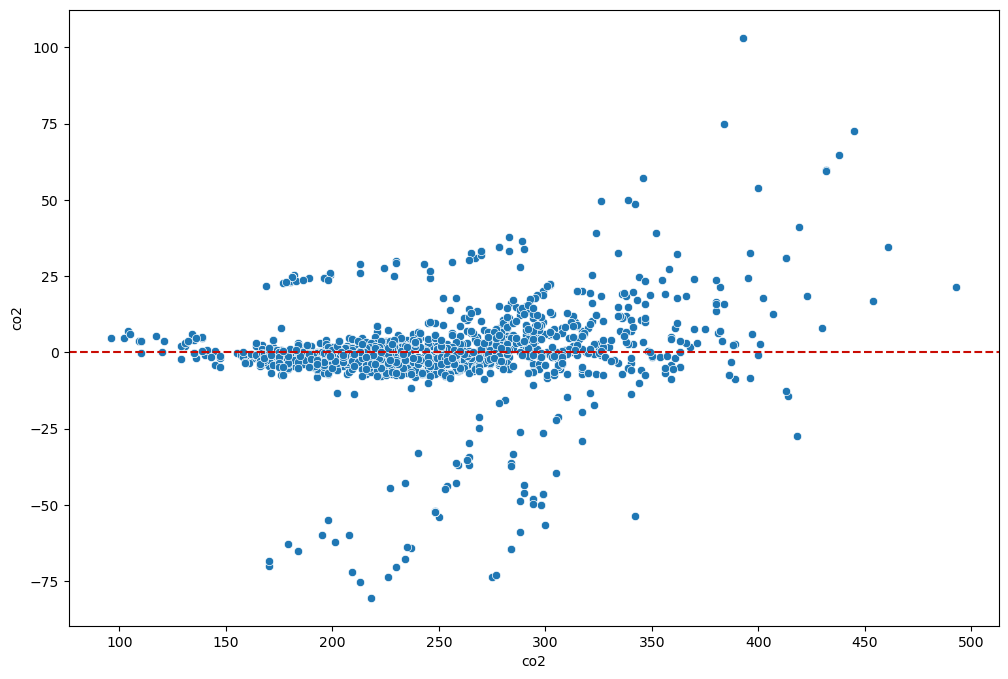

In [358]:
# Bu residleri gorsellestirelim;

plt.figure(figsize = (12,8))
sns.scatterplot(x=y_test, y=residual)
plt.axhline(y=0, color="r", linestyle = "--")
plt.show()

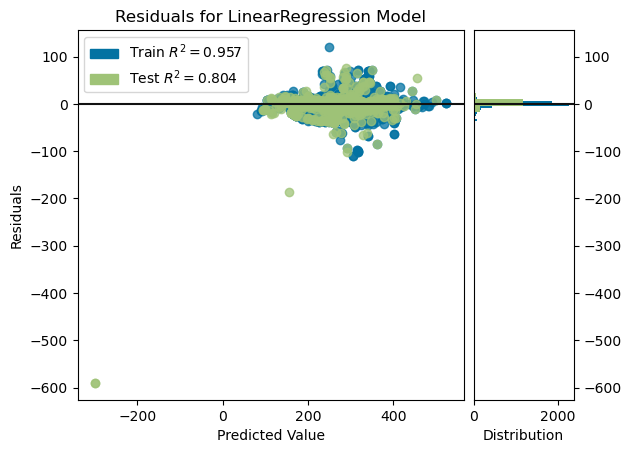

In [359]:
from yellowbrick.regressor import ResidualsPlot

model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

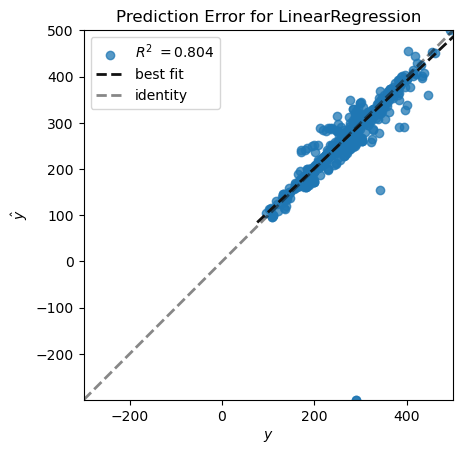

In [360]:
from yellowbrick.regressor import PredictionError

model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

# Final Model

In [361]:
final_scaler = StandardScaler()

In [362]:
X_scaled = final_scaler.fit_transform(poly_features)

In [363]:
final_model = Lasso(alpha=0.01)

In [364]:
final_model.fit(X_scaled, y)

Lasso(alpha=0.01)

## Feature Importance
### Feature Importance with Ridge

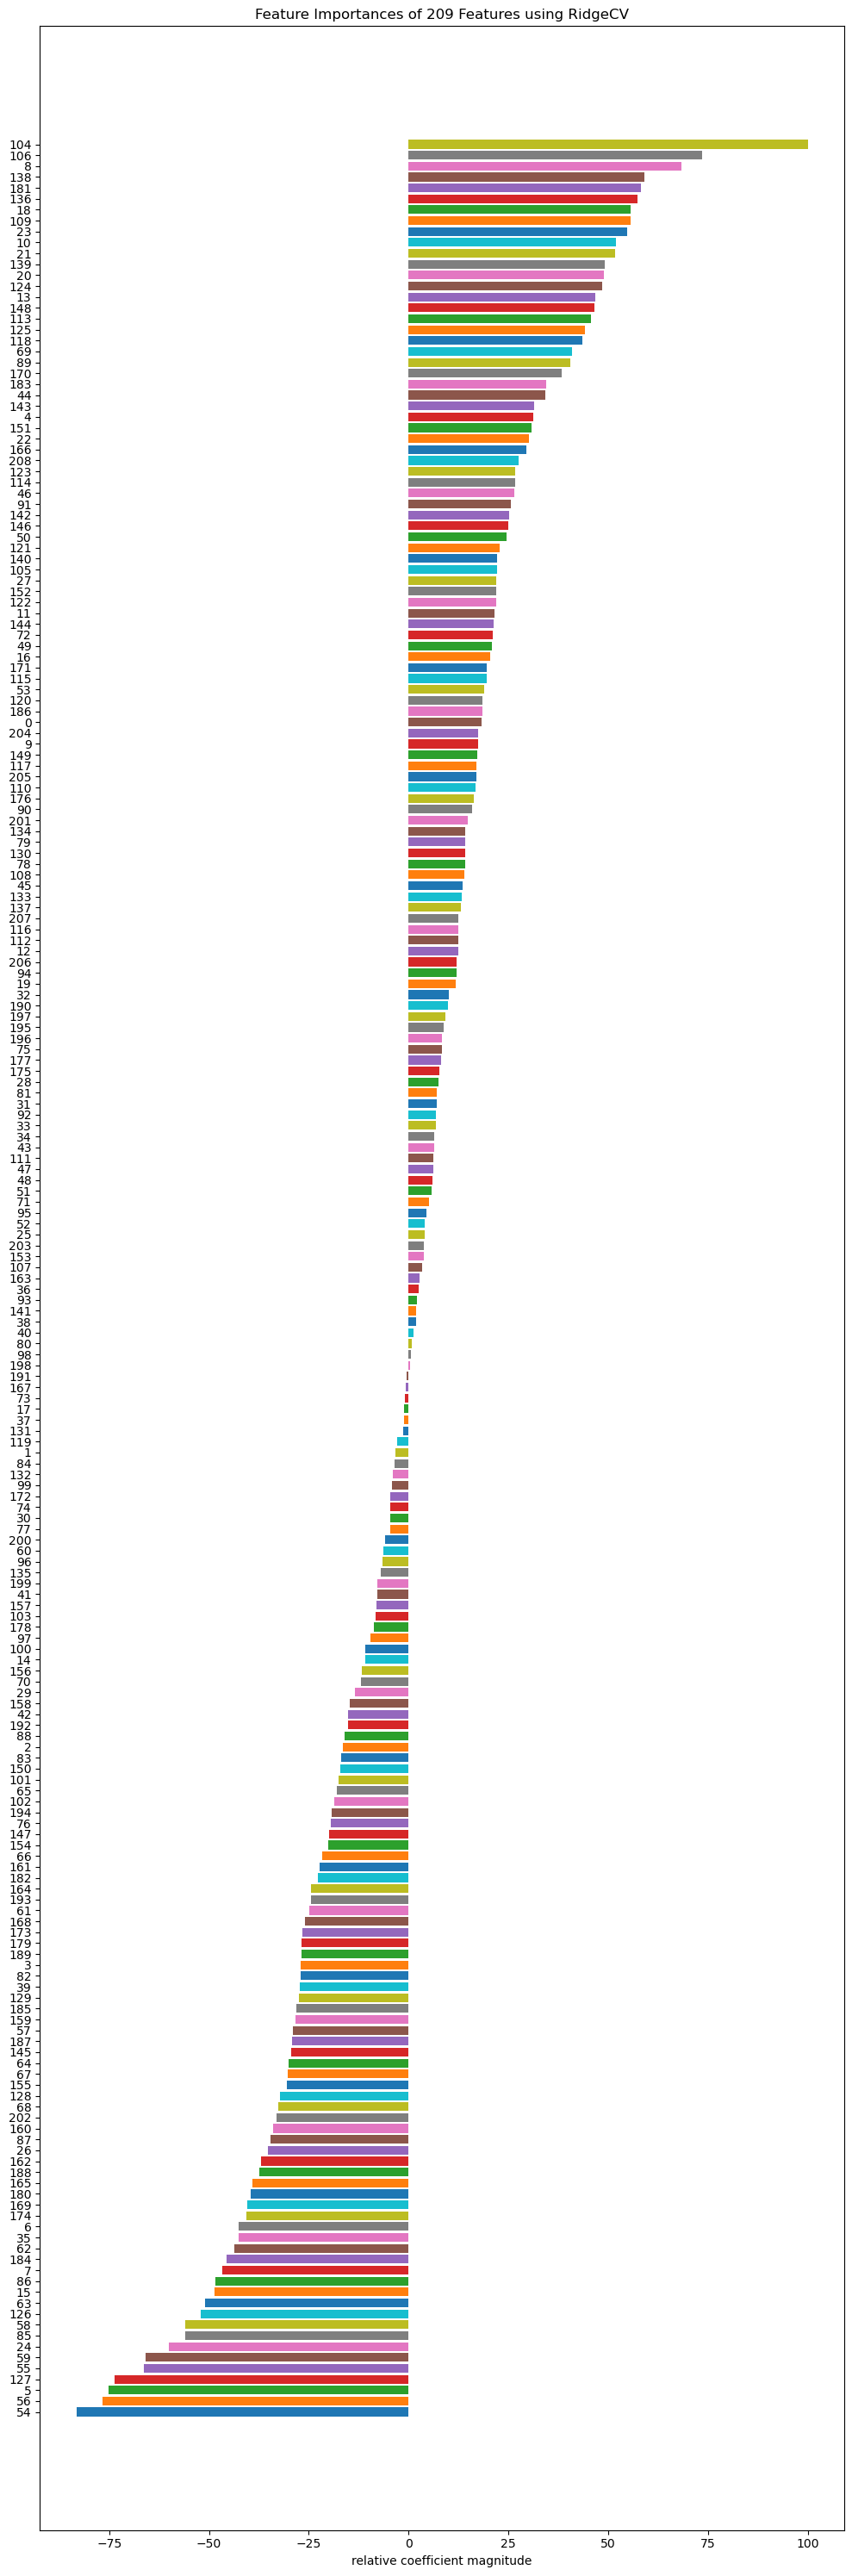

<Axes: title={'center': 'Feature Importances of 209 Features using RidgeCV'}, xlabel='relative coefficient magnitude'>

In [365]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz #figsize gibi işlem yapıyor görseli büyütmek için import ediyoruz altta 720, 3000 dedik

viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train).columns) #modeli veriyorum ve X_train column namelerini
visualizer = RadViz(size=(1000, 3000))
viz.fit(X_train, y_train)
viz.show()

### Feature Importance with Lasso

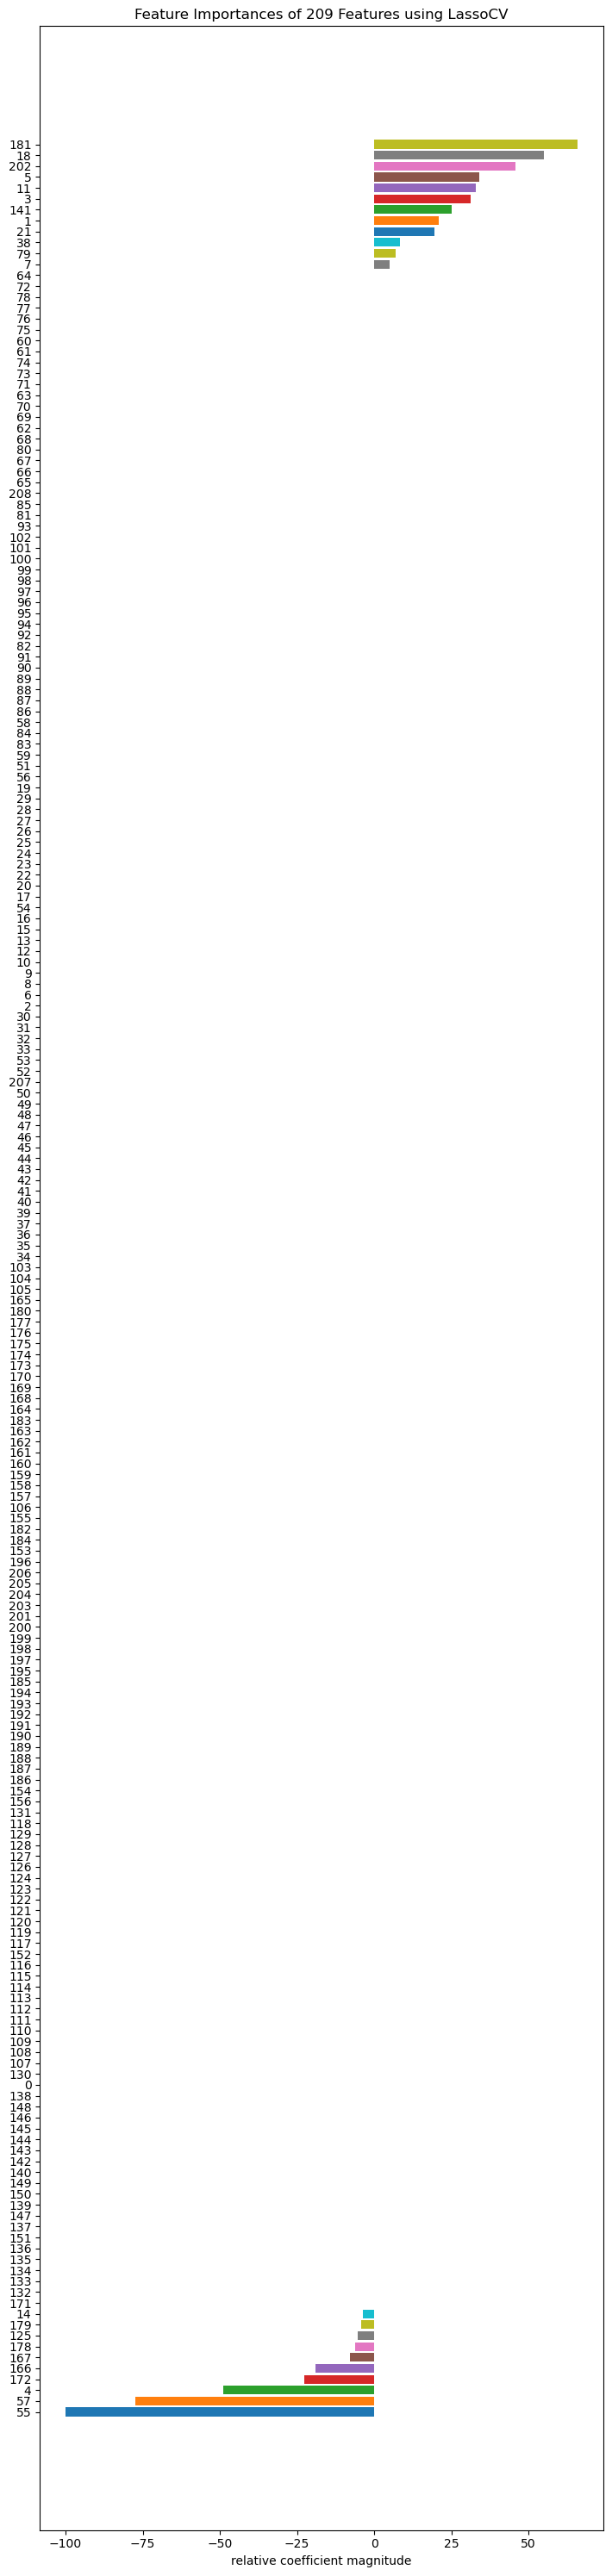

<Axes: title={'center': 'Feature Importances of 209 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [366]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()